In [1]:
# import modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import sklearn.cluster as cluster
import time
import warnings
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
plt.style.use('bmh')

## Processing Functions

In [2]:
def uniques(df):

    for col in df:
        print(df[col].unique())
        
def value_counts(df):
    
    for col in df:
        print(df[col].value_counts())
        
def remove_outliers(df,column):
    df[(np.abs(stats.zscore(column)) < 3)].shape
    
def eda(df): 
    data = {}
    data['null_sum'] = df.isnull().sum()
    data['null_pct'] = df.isnull().mean()
    data['dtypes'] = df.dtypes
    data['count'] = df.count()
    data['mean'] = df.mean()
    data['median'] = df.median()
    data['min'] = df.min()
    data['max'] = df.max()
    
    return pd.DataFrame(data)

## Cleaning Functions

In [100]:
def clean_personal(df):
    df = df.drop(['elapsed'], axis=1)
    df['Warmth'] = ((df.A1 + df.A2 + df.A3 + df.A4 + df.A5 + df.A6 + df.A7 + (df.A8*-1) +(df.A9*-1) + (df.A10*-1))*0.8)#(df['Warmth']*0.8)
    df['Reasoning'] = ((df.B1 + df.B2 + df.B3 + df.B4 + df.B5 + df.B6 + df.B7 + df.B8 + (df.B9*-1) + (df.B10*-1) + (df.B11*-1) + (df.B12*-1) + (df.B13*-1))*0.76)#(df['Reasoning']*0.76)
    df['Emotional Stability'] = ((df.C1 + df.C2 + df.C3 + df.C4 + df.C5 + (df.C6*-1) + (df.C7*-1) + (df.C8*-1) +(df.C9*-1) + (df.C10*-1))* 0.85)
    df['Dominance'] = ((df.D1 + df.D2 + df.D3 + df.D4 + df.D5 + (df.D6*-1) + (df.D7*-1) + (df.D8*-1) +(df.D9*-1) + (df.D10*-1))* 0.81)
    df['Liveliness'] = ((df.E1 + df.E2 + df.E3 + df.E4 + df.E5 + df.E6 + (df.E7*-1) + (df.E8*-1) + (df.E9*-1) + (df.E10*-1))* 0.78)
    df['Rule Consciousness'] = ((df.F1 + df.F2 + df.F3 + df.F4 + df.F5 + (df.F6*-1) + (df.F7*-1) + (df.F8*-1) +(df.F9*-1) + (df.F10*-1))* 0.84)
    df['Social Boldness'] = ((df.G1 + df.G2 + df.G3 + df.G4 + df.G5 + (df.G6*-1) + (df.G7*-1) + (df.G8*-1) +(df.G9*-1) + df.G10)* 0.80)
    df['Sensitivity'] = ((df.H1 + df.H2 + df.H3 + df.H4 + df.H5 + df.H6 + (df.H7*-1) + (df.H8*-1) +(df.H9*-1) + (df.H10*-1))* 0.73)
    df['Vigilance'] = ((df.I1 + df.I2 + df.I3 + df.I4 + df.I5 + df.I6 + (df.I7*-1) + (df.I8*-1) +(df.I9*-1) + (df.I10*-1))* 0.80)
    df['Abstractedness'] = ((df.J1 + df.J2 + df.J3 + df.J4 + df.J5 + df.J6 + df.J7 + (df.J8*-1) +(df.J9*-1) + (df.J10*-1))* 0.80)
    df['Privateness'] = ((df.K1 + df.K2 + df.K3 + df.K4 + df.K5 + (df.K6*-1) + (df.K7*-1) + (df.K8*-1) +(df.K9*-1) + (df.K10*-1))* 0.86)
    df['Apprehension'] = ((df.L1 + df.L2 + df.L3 + df.L4 + df.L5 + df.L6 + df.L7 + (df.L8*-1) +(df.L9*-1) + (df.L10*-1))* 0.80)
    df['Openness to Change'] = ((df.M1 + df.M2 + df.M3 + df.M4 + df.M5 + (df.M6*-1) + (df.M7*-1) + (df.M8*-1) +(df.M9*-1) + (df.M10*-1))* 0.82)
    df['Self-Reliance'] = ((df.N1 + df.N2 + df.N3 + df.N4 + df.N5 + df.N6 + df.N7 + (df.N8*-1) +(df.N9*-1) + (df.N10*-1))* 0.73)
    df['Perfectionism'] = ((df.O1 + df.O2 + df.O3 + df.O4 + df.O5 + df.O6 + df.O7 +(df.O8*-1) +(df.O9*-1) + (df.O10*-1))* 0.81)
    df['Tension'] = ((df.P1 + df.P2 + df.P3 + df.P4 + df.P5 + df.P6 + df.P7 + (df.P8*-1) +(df.P9*-1) + (df.P10*-1))* 0.86)
    return df.iloc[:,168:184]


## Data Preparation

**Dataset Summary**
Data Taken from https://openpsychometrics.org/_rawdata/
n = 41959

In [5]:
#Load DF 
data = pd.read_csv("data_delimited.csv", delimiter='\t')
data.head()

A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  B1  B2  B3  B4  B5  B6  B7  B8  \
0   1   4   2   3   3   2   3   4   4    3   4   4   5   4   5   4   5   4   
1   4   3   4   3   4   4   4   4   2    2   4   4   4   4   5   4   3   2   
2   3   4   4   4   4   4   4   3   2    2   4   4   5   5   4   4   4   4   
3   4   5   4   4   4   3   3   2   2    2   4   2   4   5   4   5   4   4   
4   4   0   4   4   4   3   5   1   2    4   2   4   4   5   5   4   4   5   

   B9  B10  B11  B12  B13  C1  C2  C3  C4  C5  C6  C7  C8  C9  C10  D1  D2  \
0   1    2    1    1    1   4   5   4   4   2   4   4   3   3    2   4   3   
1   3    2    4    1    1   1   2   3   3   2   5   4   4   3    3   4   2   
2   2    2    2    2    2   2   4   4   3   3   3   4   2   3    0   3   3   
3   3    3    3    2    4   3   2   3   4   3   3   2   2   3    4   3   2   
4   4    1    5    1    2   2   4   3   3   4   4   4   4   3    2   5   4   

   D3  D4  D5  D6  D7  D8  D9  D10  E1  E2  E3  E4  E5  E6  E7  E8  E9  E10  \
0   5   5   4   4   3   2   4    3   1   1   4   3   4   5   1   3   3    4   
1   4   4   4   5   4   2   3    1   1   2   4   1   4   2   2   4   2    1   
2   2   2   3   4   3   1   3    3   1   1   3   1   4   2   3   4   2    4   
3   3   4   2   3   3   3   4    3   3   2   4   1   4   4   1   3   2    2   
4   3   4   5   4   1   1   1    3   1   1   3   1   4   2   4   5   2    3   

   F1  F2  F3  F4  F5  F6  F7  F8  F9  F10  G1  G2  G3  G4  G5  G6  G7  G8  \
0   2   2   5   1   1   4   3   5   4    4   3   1   4   2   3   4   3   1   
1   3   4   2   4   5   2   4   4   2    4   3   4   2   4   4   2   3   2   
2   3   4   1   2   3   3   3   2   3    4   2   2   1   3   3   3   3   3   
3   4   3   1   3   2   4   3   4   3    3   2   4   4   4   3   3   3   2   
4   4   4   4   4   4   2   4   4   1    3   3   1   4   2   5   2   1   1   

   G9  G10  H1  H2  H3  H4  H5  H6  H7  H8  H9  H10  I1  I2  I3  I4  I5  I6  \
0   5    1   5   5   5   3   3   3   3   1   2    4   3   4   4   3   4   4   
1   3    3   5   5   5   1   4   3   4   2   1    2   5   4   3   2   4   2   
2   5    4   3   4   3   4   1   4   2   3   0    2   3   4   4   3   4   2   
3   3    3   4   5   2   1   4   2   3   2   2    2   2   2   4   3   4   2   
4   2    2   4   4   3   3   1   4   2   4   1    2   4   2   4   4   2   2   

   I7  I8  I9  I10  J1  J2  J3  J4  J5  J6  J7  J8  J9  J10  K1  K2  K3  K4  \
0   2   4   2    4   5   5   5   5   5   5   5   2   1    1   2   3   2   4   
1   2   2   3    2   5   4   5   4   4   2   4   3   2    2   3   4   2   4   
2   2   3   4    4   4   4   4   5   5   3   3   3   1    1   3   4   4   4   
3   4   2   4    1   5   5   5   5   5   4   4   1   1    1   3   3   1   4   
4   3   2   3    3   3   4   2   4   4   1   2   5   4    2   4   4   1   4   

   K5  K6  K7  K8  K9  K10  L1  L2  L3  L4  L5  L6  L7  L8  L9  L10  M1  M2  \
0   4   5   2   5   2    5   3   4   3   3   5   3   4   4   2    4   5   4   
1   3   2   2   2   3    4   3   4   4   4   2   1   4   2   2    3   4   2   
2   4   3   2   2   3    4   4   3   3   4   4   4   2   3   3    4   3   4   
3   3   2   2   2   3    3   3   2   4   3   4   4   4   4   3    2   4   4   
4   4   2   3   2   2    4   4   2   4   4   4   4   4   1   3    3   2   4   

   M3  M4  M5  M6  M7  M8  M9  M10  N1  N2  N3  N4  N5  N6  N7  N8  N9  N10  \
0   4   4   4   1   1   1   3    3   4   4   4   4   4   5   5   4   4    3   
1   4   4   2   1   1   1   2    2   4   2   4   5   5   5   5   2   4    1   
2   5   4   4   2   1   2   1    2   4   4   5   4   4   5   4   3   4    1   
3   5   3   2   1   4   2   2    2   4   5   5   5   5   5   5   1   3    3   
4   4   4   5   1   2   2   1    2   3   3   4   4   5   4   5   4   4    2   

   O1  O2  O3  O4  O5  O6  O7  O8  O9  O10  P1  P2  P3  P4  P5  P6  P7  P8  \
0   4   2   3   4   3   2   2   4   4    4   5   5   5   4   4   5   1   2   
1   3   2   4   2   3   2   2   3   4    4   4   4   4   2   3   

In [102]:
#Useless with this set
#eda(data)

null_sum  null_pct  dtypes  count          mean  median   min  \
A1               0  0.000000   int64  49159      3.649566     4.0   0.0   
A10              0  0.000000   int64  49159      2.428853     2.0   0.0   
A2               0  0.000000   int64  49159      3.791513     4.0   0.0   
A3               0  0.000000   int64  49159      3.799121     4.0   0.0   
A4               0  0.000000   int64  49159      3.633495     4.0   0.0   
A5               0  0.000000   int64  49159      3.828495     4.0   0.0   
A6               0  0.000000   int64  49159      3.670376     4.0   0.0   
A7               0  0.000000   int64  49159      3.869871     4.0   0.0   
A8               0  0.000000   int64  49159      2.960658     3.0   0.0   
A9               0  0.000000   int64  49159      2.140463     2.0   0.0   
B1               0  0.000000   int64  49159      3.677902     4.0   0.0   
B10              0  0.000000   int64  49159      2.609309     2.0   0.0   
B11              0  0.000000   int64  49159      2.723489     3.0   0.0   
B12              0  0.000000   int64  49159      1.912081     2.0   0.0   
B13              0  0.000000   int64  49159      2.152648     2.0   0.0   
B2               0  0.000000   int64  49159      3.495148     4.0   0.0   
B3               0  0.000000   int64  49159      4.143372     4.0   0.0   
B4               0  0.000000   int64  49159      4.315853     4.0   0.0   
B5               0  0.000000   int64  49159      3.976586     4.0   0.0   
B6               0  0.000000   int64  49159      3.496389     4.0   0.0   
B7               0  0.000000   int64  49159      3.505889     4.0   0.0   
B8               0  0.000000   int64  49159      3.791900     4.0   0.0   
B9               0  0.000000   int64  49159      2.988120     3.0   0.0   
C1               0  0.000000   int64  49159      2.809740     3.0   0.0   
C10              0  0.000000   int64  49159      2.516731     2.0   0.0   
C2               0  0.000000   int64  49159      3.643626     4.0   0.0   
C3               0  0.000000   int64  49159      3.371590     4.0   0.0   
C4               0  0.000000   int64  49159      3.349499     4.0   0.0   
C5               0  0.000000   int64  49159      2.931528     3.0   0.0   
C6               0  0.000000   int64  49159      2.896804     3.0   0.0   
C7               0  0.000000   int64  49159      2.750239     3.0   0.0   
C8               0  0.000000   int64  49159      2.312679     2.0   0.0   
C9               0  0.000000   int64  49159      2.337761     2.0   0.0   
D1               0  0.000000   int64  49159      3.454098     4.0   0.0   
D10              0  0.000000   int64  49159      2.462235     2.0   0.0   
D2               0  0.000000   int64  49159      3.309262     3.0   0.0   
D3               0  0.000000   int64  49159      3.549645     4.0   0.0   
D4               0  0.000000   int64  49159      3.475355     4.0   0.0   
D5               0  0.000000   int64  49159      3.634919     4.0   0.0   
D6               0  0.000000   int64  49159      3.551252     4.0   0.0   
D7               0  0.000000   int64  49159      2.652658     3.0   0.0   
D8               0  0.000000   int64  49159      2.100694     2.0   0.0   
D9               0  0.000000   int64  49159      2.861714     3.0   0.0   
E1               0  0.000000   int64  49159      2.547509     2.0   0.0   
E10              0  0.000000   int64  49159      2.322138     2.0   0.0   
E2               0  0.000000   int64  49159      2.875669     3.0   0.0   
E3               0  0.000000   int64  49159      3.787730     4.0   0.0   
E4               0  0.000000   int64  49159      2.737301     3.0   0.0   
E5               0  0.000000   int64  49159      3.872028     4.0   0.0   
E6               0  0.000000   int64  49159      2.797128     3.0   0.0   
E7               0  0.000000   int64  49159      2.176285     2.0   0.0   
E8               0  0.000000   int64  49159      3.104294     3.0   0.0   
E9               0  0.000000   int6

In [7]:
data[data.iloc[:, 0:162].sum(axis=1)< 200]

A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  B1  B2  B3  B4  B5  B6  B7  \
50      1   1   1   1   1   1   1   1   1    1   1   1   1   1   1   1   1   
93      0   0   0   0   0   0   4   0   0    0   0   0   0   0   0   0   0   
137     1   1   1   1   1   1   1   1   1    1   1   1   1   1   1   1   1   
435     0   0   0   0   0   0   0   0   0    0   0   0   0   0   0   0   0   
668     0   0   0   0   0   0   0   0   0    0   0   0   0   0   0   0   0   
716     0   0   0   0   0   0   0   0   0    0   0   0   0   0   0   0   0   
719     0   0   0   0   0   0   0   0   0    0   0   0   0   0   0   0   0   
953     0   0   0   0   2   0   4   0   0    0   0   0   0   0   0   0   0   
1393    0   0   0   0   0   0   3   0   0    0   0   0   0   0   0   0   0   
1451    0   0   0   0   5   0   4   0   0    0   0   0   0   0   0   0   0   
1485    0   0   0   0   0   0   1   0   0    0   0   0   0   0   0   0   0   
1545    0   0   0   0   0   0   0   0   0    0   0   0   0   0   0   0   0   
1739    0   0   0   0   0   0   0   0   0    0   0   0   0   0   0   0   0   
1746    0   0   0   0   0   0   0   0   0    0   0   0   0   0   0   0   0   
1973    0   0   0   0   5   0   5   0   0    0   0   0   0   0   0   0   0   
2061    3   0   0   3   4   0   5   0   3    0   0   0   0   0   3   3   0   
2081    0   0   0   0   0   0   0   0   0    0   0   0   0   0   0   0   0   
2420    0   0   0   0   0   0   0   0   0    0   0   0   0   0   0   0   0   
2449    0   0   0   0   4   0   4   0   0    0   0   0   0   0   0   0   0   
2611    1   1   1   1   1   1   1   1   1    1   1   1   1   1   1   1   1   
2791    1   1   1   1   1   1   1   1   1    1   1   1   1   1   1   1   1   
2951    0   0   0   0   2   0   0   0   0    0   0   0   0   0   0   0   0   
3031    0   0   0   0   0   0   0   0   0    0   0   0   0   0   0   0   0   
3038    0   0   0   0   0   0   0   0   0    0   0   0   0   0   0   0   0   
3074    0   0   0   0   3   3   3   0   0    0   0   0   0   4   0   0   0   
3128    0   0   1   0   1   1   3   0   0    0   0   1   1   1   0   0   0   
3351    0   0   0   0   0   0   0   0   0    0   0   0   0   0   0   0   0   
3421    0   0   0   0   4   0   4   0   0    0   0   0   0   0   0   0   0   
3434    0   0   0   0   4   4   3   0   0    0   0   0   0   4   0   0   0   
3502    0   0   0   0   4   5   5   0   0    0   0   0   0   5   0   0   0   
3564    0   0   0   0   0   0   0   0   0    0   0   0   0   0   0   0   0   
3594    0   0   0   0   0   0   5   0   0    0   0   0   0   0   0   0   0   
3688    0   0   0   0   4   3   2   0   0    0   0   0   0   5   0   0   0   
3894    0   0   0   0   3   0   4   0   0    0   0   0   0   0   0   0   0   
3967    0   0   0   5   5   0   5   0   0    0   0   0   0   0   0   0   0   
3969    0   0   0   0   0   0   4   0   0    0   0   0   0   0   0   0   0   
4050    0   0   0   0   3   3   3   0   0    0   0   0   0   3   0   0   0   
4058    0   0   0   0   0   0   0   0   0    0   0   0   0   0   0   0   0   
4113    1   1   1   1   1   1   1   1   1    1   1   1   1   1   1   1   1   
4362    0   0   0   0   0   0   0   0   0    0   0   0   0   0   0   0   0   
4401    0   0   0   0   0   0   0   0   0    0   0   0   0   0   0   0   0   
4485    0   0   0   0   1   0   1   0   0    0   0   0   0   0   0   0   0   
4596    0   0   0   0   0   0   4   0   0    0   0   0   0   0   0   0   0   
4607    0   0   0   0   2   4   4   0   0    0   0   0   0   4   0   0   0   
4610    0   0   0   0   0   0   0   0   0    0   0   0   0   0   0   0   0   
4613    0   0   0   0   0   0   0   0   0    0   0   0   0   0   0   0   0   
4707    0   0   0   0   2   0   4   0   0    0   0   0   0   0   0   0   0   
4931    0   0   0   0   4   4   4   0   0    0   0   0   0   4   0   0   0   
4973    1   1   1   1   1   1   1   1   1    1   1   1   1   1   1   1   1   
5140    0   0   0   0   0   0   0   0   0    0   0   0   0   0   0   0   0   
5193    0   0   0   0   4   0

In [8]:
data.iloc[:, 0:162].mean(axis=1)

0        3.358025
1        3.049383
2        3.055556
3        3.117284
4        3.074074
5        3.209877
6        2.919753
7        3.216049
8        3.117284
9        2.925926
10       3.537037
11       3.049383
12       2.907407
13       3.537037
14       2.956790
15       3.351852
16       3.351852
17       2.808642
18       2.993827
19       3.141975
20       3.154321
21       2.913580
22       3.314815
23       3.191358
24       3.074074
25       2.827160
26       2.975309
27       3.074074
28       3.314815
29       3.827160
30       2.870370
31       2.944444
32       3.209877
33       2.932099
34       3.018519
35       3.018519
36       3.067901
37       3.104938
38       2.975309
39       3.401235
40       3.037037
41       4.123457
42       3.179012
43       3.246914
44       3.339506
45       3.351852
46       3.117284
47       3.172840
48       2.944444
49       2.975309
50       1.000000
51       3.061728
52       3.209877
53       3.358025
54       3.308642
55       3

In [9]:
#Copying data to df
df = data.copy()

In [10]:
#Replacing NaN's
df = df.replace(['0', 0], np.nan)

In [11]:
nulls_percent_df = pd.DataFrame(df.isna().sum()/len(df)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']

In [12]:
len(nulls_percent_df)

169

In [13]:
#Checking which columns have no null entries
nulls_percent_df[nulls_percent_df['nulls_percentage'] == 0]

column_name  nulls_percentage
163         age               0.0
165    accuracy               0.0
167      source               0.0
168     elapsed               0.0

In [14]:
#Checking which columns have a null percent above 0.015
nulls_percent_df[nulls_percent_df['nulls_percentage'] > 0.015].max()

column_name                O6
nulls_percentage    0.0165585
dtype: object

## Dealing with 0's and Removing Nulls

- 671 entries had missed questions
- Dropped instead of manipulated, not a significant enough effect on the sample

In [15]:
df.dropna(0, 'any', inplace =True)

## Checking for Unrealistic Submissions

Checking segments using survey sums to eliminate improper entries.

Questions are inverted likert scales so there will almost certainly be inverted 1:5 or 2:4 pairings. On this basis, we can use low sums to eliminate low quality entries

In [16]:
df.shape

(35211, 169)

In [17]:
len (df[df.iloc[:, 0:162].sum(axis=1)< 500])

12224

In [18]:
len (df[df.iloc[:, 0:162].sum(axis=1)< 350])

53

In [19]:
len (df[data.iloc[:, 0:162].sum(axis=1)< 500])

12224

In [20]:
len (df[data.iloc[:, 0:162].sum(axis=1)< 450])

320

In [21]:
len (df[data.iloc[:, 0:162].sum(axis=1)< 400])

66

In [85]:
df[df.iloc[:, 0:162].sum(axis=1).between(400, 450, inclusive=False)].shape

(254, 169)

In [83]:
df[df.iloc[:, 0:162].sum(axis=1).between(400, 450, inclusive=False)]

(254, 169)


A1   A2   A3   A4   A5   A6   A7   A8   A9  A10   B1   B2   B3   B4  \
178    4.0  4.0  4.0  5.0  5.0  5.0  5.0  1.0  1.0  1.0  4.0  3.0  4.0  5.0   
231    4.0  2.0  2.0  4.0  3.0  2.0  4.0  2.0  2.0  4.0  2.0  2.0  4.0  4.0   
269    4.0  4.0  4.0  4.0  4.0  4.0  3.0  4.0  1.0  3.0  1.0  3.0  4.0  5.0   
370    4.0  4.0  5.0  4.0  5.0  5.0  5.0  4.0  1.0  1.0  4.0  2.0  4.0  5.0   
397    4.0  5.0  4.0  4.0  5.0  5.0  5.0  1.0  1.0  1.0  1.0  1.0  5.0  5.0   
627    3.0  3.0  1.0  1.0  2.0  1.0  2.0  2.0  2.0  4.0  2.0  3.0  3.0  4.0   
1266   4.0  5.0  5.0  1.0  4.0  5.0  4.0  1.0  1.0  2.0  4.0  2.0  2.0  5.0   
1345   5.0  5.0  2.0  5.0  5.0  5.0  5.0  1.0  1.0  1.0  5.0  5.0  4.0  5.0   
1356   3.0  3.0  2.0  1.0  4.0  4.0  5.0  5.0  2.0  5.0  4.0  4.0  1.0  5.0   
1725   5.0  4.0  2.0  4.0  4.0  4.0  4.0  2.0  2.0  2.0  4.0  3.0  5.0  5.0   
1827   3.0  3.0  3.0  3.0  3.0  4.0  4.0  3.0  1.0  1.0  3.0  3.0  3.0  5.0   
2353   4.0  5.0  4.0  4.0  3.0  4.0  4.0  4.0  1.0  2.0  3.0  4.0  4.0  5.0   
2753   5.0  5.0  1.0  5.0  5.0  5.0  3.0  1.0  1.0  3.0  5.0  4.0  5.0  5.0   
2903   5.0  1.0  4.0  5.0  4.0  3.0  4.0  5.0  1.0  1.0  4.0  2.0  5.0  5.0   
2955   4.0  2.0  3.0  4.0  3.0  3.0  4.0  1.0  2.0  2.0  4.0  4.0  4.0  5.0   
3308   3.0  4.0  1.0  1.0  3.0  4.0  4.0  3.0  3.0  5.0  1.0  1.0  4.0  3.0   
3373   4.0  3.0  5.0  4.0  4.0  4.0  4.0  1.0  1.0  2.0  2.0  3.0  3.0  3.0   
3427   5.0  5.0  5.0  2.0  4.0  4.0  5.0  5.0  1.0  2.0  1.0  2.0  4.0  5.0   
3609   2.0  2.0  2.0  3.0  2.0  3.0  3.0  3.0  2.0  2.0  2.0  2.0  3.0  4.0   
3715   2.0  4.0  4.0  2.0  3.0  2.0  4.0  2.0  1.0  1.0  5.0  4.0  5.0  4.0   
3878   5.0  4.0  4.0  4.0  4.0  4.0  4.0  1.0  1.0  1.0  5.0  2.0  4.0  5.0   
3889   1.0  2.0  4.0  5.0  2.0  1.0  1.0  3.0  2.0  5.0  1.0  3.0  1.0  4.0   
3975   5.0  4.0  5.0  5.0  4.0  2.0  4.0  3.0  1.0  1.0  4.0  2.0  3.0  5.0   
4007   3.0  4.0  2.0  2.0  4.0  2.0  4.0  2.0  2.0  3.0  2.0  1.0  2.0  5.0   
4093   2.0  2.0  1.0  2.0  2.0  2.0  1.0  4.0  4.0  5.0  2.0  1.0  1.0  1.0   
4322   5.0  4.0  2.0  4.0  5.0  5.0  4.0  2.0  4.0  2.0  4.0  1.0  2.0  5.0   
4518   4.0  4.0  2.0  4.0  4.0  4.0  4.0  4.0  2.0  3.0  4.0  4.0  4.0  5.0   
4536   1.0  1.0  1.0  1.0  1.0  1.0  4.0  5.0  5.0  3.0  4.0  5.0  5.0  5.0   
4542   1.0  2.0  2.0  2.0  1.0  2.0  1.0  4.0  4.0  3.0  3.0  4.0  3.0  4.0   
4991   4.0  4.0  2.0  4.0  4.0  4.0  5.0  4.0  2.0  1.0  3.0  1.0  4.0  5.0   
5374   5.0  5.0  5.0  5.0  5.0  5.0  5.0  1.0  1.0  1.0  1.0  1.0  3.0  3.0   
5767   3.0  3.0  3.0  4.0  2.0  3.0  1.0  3.0  2.0  3.0  3.0  4.0  2.0  3.0   
5838   3.0  4.0  1.0  4.0  2.0  2.0  3.0  4.0  2.0  2.0  1.0  2.0  4.0  3.0   
5890   4.0  4.0  1.0  3.0  4.0  3.0  3.0  2.0  2.0  2.0  3.0  4.0  3.0  1.0   
5892   2.0  2.0  2.0  2.0  3.0  3.0  4.0  3.0  3.0  3.0  2.0  2.0  2.0  2.0   
5986   5.0  4.0  4.0  4.0  5.0  4.0  4.0  2.0  1.0  1.0  3.0  4.0  2.0  5.0   
6442   4.0  3.0  4.0  4.0  4.0  5.0  4.0  1.0  2.0  2.0  4.0  2.0  4.0  4.0   
6614   4.0  1.0  4.0  4.0  3.0  2.0  5.0  1.0  2.0  3.0  4.0  5.0  5.0  5.0   
7432   4.0  4.0  4.0  4.0  4.0  4.0  4.0  2.0  1.0  1.0  4.0  3.0  4.0  4.0   
7521   3.0  5.0  5.0  4.0  4.0  4.0  3.0  1.0  1.0  1.0  4.0  4.0  4.0  5.0   
7907   4.0  4.0  4.0  2.0  5.0  4.0  3.0  3.0  2.0  3.0  4.0  4.0  3.0  4.0   
7941   5.0  5.0  3.0  3.0  5.0  5.0  5.0  4.0  2.0  1.0  3.0  3.0  3.0  5.0   
8057   3.0  4.0  3.0  2.0  5.0  4.0  3.0  5.0  1.0  4.0  5.0  5.0  4.0  5.0   
8176   4.0  2.0  4.0  4.0  4.0  4.0  4.0  2.0  2.0  2.0  3.0  3.0  2.0  4.0   
8178   3.0  4.0  3.0  3.0  4.0  4.0  3.0  3.0  2.0  3.0  3.0  3.0  4.0  4.0   
8767   4.0  4.0  4.0  4.0  4.0  4.0  4.0  3.0  1.0  1.0  4.0  4.0  4.0  4.0   
9033   3.0  2.0  2.0  2.0  4.0  3.0  3.0  1.0  4.0  3.0  4.0  5.0  5.0  5.0   
9044   4.0  4.0  1.0  1.0  5.0  5.0  3.0  4.0  3.0  4.0  3.0  4.0  5.0  4.0   
9141   3.0  4.0  4.0  4.0  3.0  4.0  4.0  4.0  2.0  2.0  3.0  4.0  4.0  4.0   
9260   4.0  5.0  5.0  5.0  5.0  4.0  4.0  2.0  1.0  1.0  5

In [23]:
df[df.iloc[:, 0:162].sum(axis=1).between(350, 400, inclusive=False)]

A1   A2   A3   A4   A5   A6   A7   A8   A9  A10   B1   B2   B3   B4  \
3226   2.0  3.0  3.0  2.0  1.0  1.0  1.0  2.0  3.0  4.0  2.0  4.0  1.0  1.0   
13646  2.0  1.0  3.0  2.0  1.0  4.0  1.0  2.0  3.0  3.0  1.0  3.0  2.0  2.0   
16713  2.0  3.0  2.0  2.0  2.0  2.0  1.0  2.0  2.0  2.0  2.0  3.0  3.0  2.0   
19205  1.0  1.0  1.0  4.0  1.0  1.0  4.0  3.0  3.0  3.0  1.0  3.0  1.0  1.0   
20589  4.0  1.0  3.0  1.0  2.0  2.0  2.0  1.0  2.0  3.0  1.0  3.0  2.0  2.0   
22511  4.0  4.0  1.0  1.0  4.0  4.0  4.0  4.0  4.0  1.0  1.0  1.0  4.0  4.0   
24813  3.0  3.0  2.0  3.0  1.0  2.0  1.0  3.0  1.0  3.0  3.0  3.0  3.0  2.0   
25519  1.0  2.0  2.0  3.0  2.0  1.0  3.0  1.0  3.0  1.0  2.0  5.0  1.0  5.0   
35488  3.0  3.0  4.0  4.0  4.0  4.0  4.0  2.0  1.0  1.0  2.0  3.0  4.0  4.0   
36436  2.0  2.0  2.0  2.0  2.0  2.0  5.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0   
37558  3.0  3.0  2.0  2.0  3.0  3.0  1.0  3.0  2.0  3.0  3.0  3.0  2.0  3.0   
39626  2.0  2.0  2.0  2.0  4.0  4.0  2.0  2.0  2.0  2.0  2.0  2.0  3.0  4.0   
47522  2.0  2.0  2.0  2.0  5.0  2.0  5.0  2.0  2.0  2.0  2.0  2.0  2.0  3.0   

        B5   B6   B7   B8   B9  B10  B11  B12  B13   C1   C2   C3   C4   C5  \
3226   4.0  4.0  3.0  1.0  2.0  3.0  1.0  2.0  1.0  1.0  1.0  2.0  1.0  1.0   
13646  2.0  3.0  2.0  3.0  1.0  3.0  3.0  3.0  1.0  2.0  2.0  2.0  3.0  3.0   
16713  2.0  2.0  2.0  2.0  3.0  2.0  2.0  3.0  2.0  2.0  2.0  3.0  2.0  2.0   
19205  1.0  3.0  1.0  1.0  1.0  3.0  2.0  5.0  2.0  4.0  1.0  3.0  3.0  3.0   
20589  3.0  2.0  1.0  2.0  4.0  3.0  1.0  1.0  2.0  1.0  2.0  3.0  3.0  1.0   
22511  4.0  1.0  1.0  1.0  1.0  1.0  4.0  1.0  1.0  1.0  4.0  4.0  4.0  4.0   
24813  2.0  2.0  3.0  2.0  2.0  3.0  1.0  3.0  3.0  2.0  3.0  3.0  3.0  1.0   
25519  1.0  5.0  1.0  1.0  1.0  1.0  2.0  2.0  1.0  2.0  1.0  1.0  1.0  2.0   
35488  4.0  2.0  3.0  3.0  3.0  1.0  1.0  1.0  1.0  2.0  3.0  3.0  1.0  2.0   
36436  2.0  2.0  2.0  2.0  2.0  2.0  5.0  2.0  3.0  2.0  2.0  2.0  2.0  2.0   
37558  3.0  2.0  3.0  3.0  2.0  3.0  2.0  3.0  2.0  2.0  2.0  3.0  2.0  2.0   
39626  4.0  2.0  2.0  4.0  2.0  2.0  1.0  2.0  2.0  4.0  3.0  2.0  2.0  4.0   
47522  2.0  2.0  2.0  3.0  2.0  2.0  4.0  2.0  2.0  1.0  2.0  2.0  2.0  1.0   

        C6   C7   C8   C9  C10   D1   D2   D3   D4   D5   D6   D7   D8   D9  \
3226   4.0  4.0  1.0  1.0  3.0  1.0  1.0  2.0  3.0  1.0  2.0  1.0  5.0  1.0   
13646  3.0  1.0  1.0  1.0  2.0  3.0  3.0  1.0  1.0  2.0  3.0  3.0  2.0  1.0   
16713  3.0  2.0  2.0  3.0  5.0  2.0  2.0  2.0  2.0  2.0  2.0  4.0  3.0  3.0   
19205  1.0  4.0  3.0  3.0  3.0  1.0  1.0  1.0  1.0  1.0  1.0  3.0  2.0  2.0   
20589  3.0  2.0  1.0  2.0  4.0  1.0  2.0  4.0  4.0  2.0  1.0  1.0  3.0  1.0   
22511  4.0  1.0  1.0  1.0  1.0  4.0  4.0  4.0  4.0  5.0  4.0  1.0  1.0  1.0   
24813  2.0  2.0  2.0  3.0  2.0  2.0  3.0  2.0  2.0  1.0  3.0  2.0  3.0  2.0   
25519  5.0  1.0  3.0  3.0  5.0  5.0  5.0  5.0  5.0  5.0  1.0  2.0  1.0  1.0   
35488  1.0  1.0  1.0  1.0  2.0  3.0  2.0  4.0  3.0  3.0  3.0  2.0  1.0  2.0   
36436  2.0  3.0  2.0  2.0  2.0  3.0  3.0  2.0  2.0  2.0  2.0  2.0  3.0  2.0   
37558  2.0  2.0  3.0  3.0  2.0  3.0  3.0  2.0  2.0  2.0  3.0  2.0  3.0  2.0   
39626  2.0  2.0  1.0  2.0  2.0  4.0  2.0  4.0  2.0  2.0  2.0  4.0  2.0  2.0   
47522  2.0  2.0  4.0  5.0  2.0  4.0  4.0  2.0  2.0  4.0  2.0  4.0  2.0  3.0   

       D10   E1   E2   E3   E4   E5   E6   E7   E8   E9  E10   F1   F2   F3  \
3226   4.0  1.0  3.0  3.0  1.0  3.0  4.0  2.0  3.0  2.0  2.0  3.0  4.0  1.0   
13646  2.0  1.0  1.0  2.0  1.0  1.0  2.0  3.0  3.0  3.0  2.0  3.0  1.0  2.0   
16713  2.0  3.0  2.0  2.0  2.0  2.0  3.0  5.0  2.0  3.0  2.0  4.0  2.0  2.0   
19205  2.0  1.0  3.0  5.0  2.0  1.0  3.0  5.0  3.0  3.0  5.0  1.0  4.0  1.0   
20589  3.0  2.0  1.0  2.0  2.0  2.0  4.0  2.0  4.0  5.0  1.0  1.0  4.0  2.0   
22511  1.0  4.0  4.0  4.0  4.0  1.0  1.0  1.0  1.0  1.0  1.0  4.0  4.0  1.0   
24813  2.0  3.0  3.0  3.0  2.0  3.0  2.0  1.0  2.0  3.0  3.0  2.0  2.0  2.0   
25519  2.0  5.0  5.0  5.0  1.0  3.0  1.0  5.0  2.0  1.0

In [24]:
df[df.iloc[:, 0:162].sum(axis=1).between(300, 350, inclusive=False)]

A1   A2   A3   A4   A5   A6   A7   A8   A9  A10   B1   B2   B3   B4  \
413    2.0  2.0  2.0  1.0  1.0  2.0  1.0  2.0  2.0  2.0  2.0  2.0  1.0  3.0   
1810   2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0   
2521   2.0  2.0  2.0  2.0  3.0  2.0  1.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0   
8866   1.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0  3.0  2.0  1.0  3.0  2.0  1.0   
23755  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0   
29311  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0   
32545  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0   
34323  2.0  2.0  2.0  2.0  1.0  2.0  1.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0   
43166  2.0  2.0  2.0  2.0  2.0  2.0  1.0  2.0  2.0  2.0  2.0  3.0  2.0  3.0   
48088  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0   

        B5   B6   B7   B8   B9  B10  B11  B12  B13   C1   C2   C3   C4   C5  \
413    2.0  2.0  2.0  2.0  2.0  2.0  1.0  2.0  1.0  2.0  2.0  2.0  1.0  2.0   
1810   2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0   
2521   2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  3.0  2.0  2.0  2.0  3.0   
8866   2.0  2.0  2.0  2.0  1.0  1.0  1.0  2.0  1.0  2.0  1.0  1.0  2.0  2.0   
23755  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0   
29311  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0   
32545  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0   
34323  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  3.0  2.0  2.0  2.0  2.0   
43166  3.0  2.0  2.0  3.0  3.0  2.0  2.0  2.0  2.0  3.0  2.0  2.0  2.0  2.0   
48088  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0   

        C6   C7   C8   C9  C10   D1   D2   D3   D4   D5   D6   D7   D8   D9  \
413    2.0  2.0  3.0  3.0  2.0  2.0  2.0  3.0  2.0  2.0  2.0  2.0  1.0  2.0   
1810   2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0   
2521   2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  3.0  2.0  2.0  2.0  2.0   
8866   1.0  2.0  1.0  3.0  2.0  2.0  2.0  1.0  3.0  3.0  3.0  1.0  1.0  2.0   
23755  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0   
29311  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0   
32545  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0   
34323  2.0  2.0  4.0  2.0  2.0  5.0  2.0  2.0  2.0  3.0  2.0  1.0  2.0  4.0   
43166  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0   
48088  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0   

       D10   E1   E2   E3   E4   E5   E6   E7   E8   E9  E10   F1   F2   F3  \
413    3.0  2.0  2.0  2.0  3.0  2.0  2.0  2.0  3.0  2.0  2.0  2.0  2.0  2.0   
1810   2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0   
2521   2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0   
8866   2.0  1.0  2.0  3.0  1.0  2.0  1.0  1.0  2.0  3.0  1.0  3.0  1.0  3.0   
23755  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0   
29311  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0   
32545  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0   
34323  2.0  2.0  2.0  2.0  4.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0   
43166  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  3.0   
48088  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0   

        F4   F5   F6   F7   F8   F9  F10   G1   G2   G3   G4   G5   G6   G7  \
413    2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  3.0  2.0   
1810   2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0   
2521   2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  3.0   
8866   2.0  2.0  1.0  3.0  1.0  3.0  2.0  2.0  2.0  2.0  2.0  1.0  1.0  1.0   
23755  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0   
29311  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.

In [86]:
# Setting the DataFrame to exclude all results with a row sum of responses below 350
df2 =  df[df.iloc[:, 0:162].sum(axis=1)> 350]

In [26]:
df2.shape

(35158, 169)

## Cleaning the Data Based on Administration of the Test

'Administration of the test takes about 35–50 minutes for the paper-and-pencil version and about 30 minutes by computer. The test instructions are simple and straightforward and **the test is un-timed**; thus, the test is generally self-administrable and can be used in either an individual or a group setting. The 16PF test was designed for adults at **least age 16 and older**, but there are also parallel tests for various younger age ranges (e.g., the 16PF Adolescent Personality Questionnaire[14]).

The 16PF Questionnaire has been translated into more than 30 languages and dialects.[13] Thus the test can be administered in different languages, scored based on either local, national, or international normative samples, and computerized interpretive reports provided in about 23 different languages. The test has generally been culturally adapted (rather than just translated) in these countries, with local standardization samples plus reliability and validity information collected locally and presented in individual manuals.' - Wikipedia - cmon it's a Python notebook

**Steps**
1. Drop 'Elapsed'
2. Fix Age Range

In [27]:
df2 = df2.drop(['elapsed'], axis=1)

In [28]:
df2.dtypes

A1          float64
A2          float64
A3          float64
A4          float64
A5          float64
A6          float64
A7          float64
A8          float64
A9          float64
A10         float64
B1          float64
B2          float64
B3          float64
B4          float64
B5          float64
B6          float64
B7          float64
B8          float64
B9          float64
B10         float64
B11         float64
B12         float64
B13         float64
C1          float64
C2          float64
C3          float64
C4          float64
C5          float64
C6          float64
C7          float64
C8          float64
C9          float64
C10         float64
D1          float64
D2          float64
D3          float64
D4          float64
D5          float64
D6          float64
D7          float64
D8          float64
D9          float64
D10         float64
E1          float64
E2          float64
E3          float64
E4          float64
E5          float64
E6          float64
E7          float64


In [87]:
df2['gender'] = df2['gender'].astype('category')
df2['source'] = df2['source'].astype('category')
df2['country'] = df2['country'].astype('category')

##  Optional: Label Encoding Country

Not going to remove anything here, it's not for predictive purposes, but fun for comparative purposes if you are creating a product from this. Label Encoding isn't useful for insight analysis if I am importing the data into Tableau

In [88]:
#df2['country'].value_counts()

In [89]:
#df2['country'] = df2['country'].cat.codes

In [90]:
df2.shape

(35158, 169)

# Exploring the Data

<AxesSubplot:xlabel='age', ylabel='Count'>

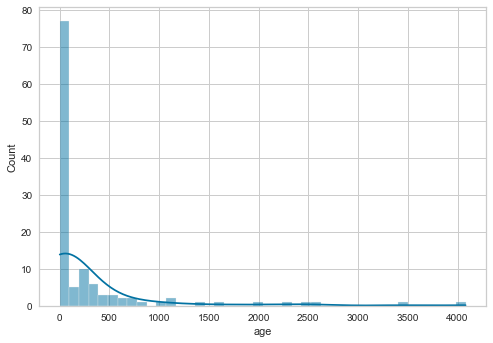

In [91]:
#Checking the distribution of ages
sns.histplot(data = df2, x = df2['age'].value_counts(), kde=True)

In [92]:
df2 = df2[df2['age'].between(16, 80, inclusive=False)]

In [93]:
df2.shape

(30687, 169)

<AxesSubplot:xlabel='age', ylabel='Count'>

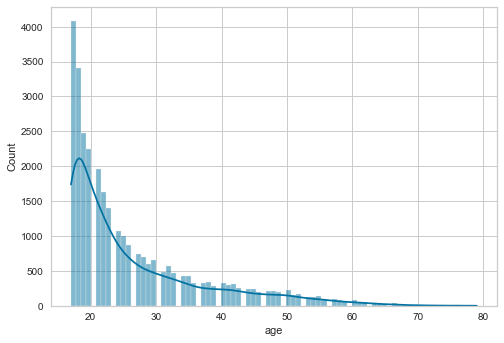

In [94]:
sns.histplot(data = df2, x = df2['age'], kde=True)

<AxesSubplot:xlabel='accuracy', ylabel='Count'>

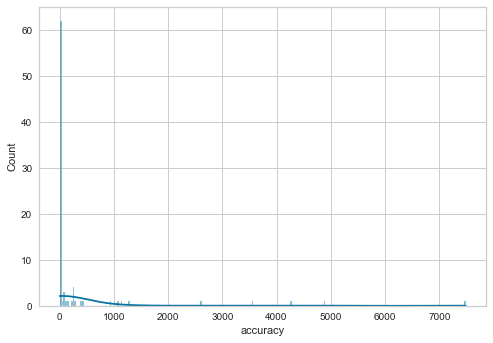

In [95]:
#Plotting Accuracy Value Counts
sns.histplot(data = df2, x = df2['accuracy'].value_counts(), kde=True)

In [96]:
#Bringing them to within a realistic range
df2 = df2[df2['accuracy'].between(0, 100, inclusive=False)]

<AxesSubplot:xlabel='accuracy', ylabel='Count'>

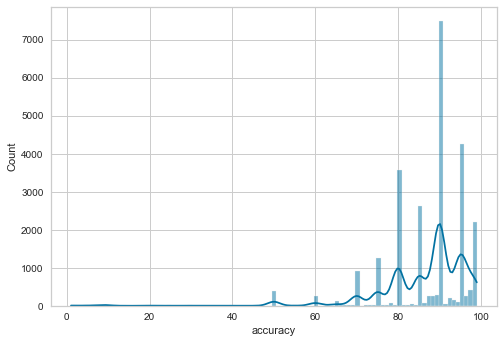

In [97]:
sns.histplot(data = df2, x = df2['accuracy'], kde=True)

In [98]:
df2 = df2[df2['accuracy'].between(80, 100, inclusive=False)]
df2.shape

(18720, 169)

In [99]:
df2.head()

A1   A2   A3   A4   A5   A6   A7   A8   A9  A10   B1   B2   B3   B4   B5  \
0   1.0  4.0  2.0  3.0  3.0  2.0  3.0  4.0  4.0  3.0  4.0  4.0  5.0  4.0  5.0   
3   4.0  5.0  4.0  4.0  4.0  3.0  3.0  2.0  2.0  2.0  4.0  2.0  4.0  5.0  4.0   
9   5.0  5.0  3.0  3.0  5.0  4.0  4.0  3.0  1.0  3.0  4.0  4.0  5.0  5.0  5.0   
10  5.0  5.0  4.0  5.0  5.0  5.0  4.0  5.0  2.0  3.0  4.0  3.0  5.0  5.0  4.0   
12  5.0  4.0  5.0  4.0  4.0  4.0  3.0  3.0  2.0  4.0  3.0  3.0  4.0  3.0  4.0   

     B6   B7   B8   B9  B10  B11  B12  B13   C1   C2   C3   C4   C5   C6   C7  \
0   4.0  5.0  4.0  1.0  2.0  1.0  1.0  1.0  4.0  5.0  4.0  4.0  2.0  4.0  4.0   
3   5.0  4.0  4.0  3.0  3.0  3.0  2.0  4.0  3.0  2.0  3.0  4.0  3.0  3.0  2.0   
9   3.0  4.0  5.0  2.0  1.0  2.0  1.0  2.0  4.0  4.0  4.0  4.0  4.0  2.0  2.0   
10  4.0  5.0  4.0  5.0  2.0  2.0  4.0  2.0  2.0  5.0  3.0  5.0  5.0  2.0  2.0   
12  4.0  2.0  4.0  1.0  2.0  1.0  1.0  1.0  3.0  5.0  4.0  2.0  1.0  4.0  2.0   

     C8   C9  C10   D1   D2   D3   D4   D5   D6   D7   D8   D9  D10   E1   E2  \
0   3.0  3.0  2.0  4.0  3.0  5.0  5.0  4.0  4.0  3.0  2.0  4.0  3.0  1.0  1.0   
3   2.0  3.0  4.0  3.0  2.0  3.0  4.0  2.0  3.0  3.0  3.0  4.0  3.0  3.0  2.0   
9   1.0  1.0  2.0  3.0  3.0  3.0  4.0  3.0  4.0  2.0  2.0  3.0  2.0  3.0  4.0   
10  1.0  2.0  2.0  2.0  5.0  4.0  4.0  3.0  4.0  3.0  4.0  3.0  4.0  3.0  5.0   
12  1.0  1.0  2.0  5.0  5.0  4.0  5.0  5.0  3.0  1.0  3.0  2.0  1.0  3.0  2.0   

     E3   E4   E5   E6   E7   E8   E9  E10   F1   F2   F3   F4   F5   F6   F7  \
0   4.0  3.0  4.0  5.0  1.0  3.0  3.0  4.0  2.0  2.0  5.0  1.0  1.0  4.0  3.0   
3   4.0  1.0  4.0  4.0  1.0  3.0  2.0  2.0  4.0  3.0  1.0  3.0  2.0  4.0  3.0   
9   5.0  3.0  4.0  3.0  1.0  2.0  2.0  2.0  3.0  4.0  5.0  5.0  5.0  1.0  3.0   
10  4.0  2.0  4.0  4.0  4.0  2.0  2.0  1.0  5.0  4.0  5.0  5.0  5.0  3.0  2.0   
12  4.0  2.0  4.0  2.0  1.0  5.0  2.0  3.0  2.0  3.0  1.0  3.0  3.0  3.0  2.0   

     F8   F9  F10   G1   G2   G3   G4   G5   G6   G7   G8   G9  G10   H1   H2  \
0   5.0  4.0  4.0  3.0  1.0  4.0  2.0  3.0  4.0  3.0  1.0  5.0  1.0  5.0  5.0   
3   4.0  3.0  3.0  2.0  4.0  4.0  4.0  3.0  3.0  3.0  2.0  3.0  3.0  4.0  5.0   
9   1.0  2.0  3.0  4.0  4.0  3.0  5.0  4.0  2.0  1.0  2.0  2.0  3.0  3.0  4.0   
10  4.0  2.0  3.0  5.0  5.0  3.0  4.0  3.0  4.0  2.0  4.0  4.0  3.0  2.0  4.0   
12  4.0  3.0  2.0  4.0  2.0  5.0  4.0  4.0  2.0  1.0  1.0  2.0  1.0  4.0  4.0   

     H3   H4   H5   H6   H7   H8   H9  H10   I1   I2   I3   I4   I5   I6   I7  \
0   5.0  3.0  3.0  3.0  3.0  1.0  2.0  4.0  3.0  4.0  4.0  3.0  4.0  4.0  2.0   
3   2.0  1.0  4.0  2.0  3.0  2.0  2.0  2.0  2.0  2.0  4.0  3.0  4.0  2.0  4.0   
9   2.0  1.0  1.0  3.0  2.0  3.0  2.0  1.0  2.0  3.0  3.0  3.0  4.0  1.0  4.0   
10  2.0  1.0  2.0  3.0  2.0  2.0  2.0  4.0  4.0  3.0  4.0  3.0  5.0  1.0  4.0   
12  4.0  4.0  4.0  3.0  1.0  2.0  1.0  1.0  4.0  2.0  2.0  3.0  5.0  2.0  2.0   

     I8   I9  I10   J1   J2   J3   J4   J5   J6   J7   J8   J9  J10   K1   K2  \
0   4.0  2.0  4.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  2.0  1.0  1.0  2.0  3.0   
3   2.0  4.0  1.0  5.0  5.0  5.0  5.0  5.0  4.0  4.0  1.0  1.0  1.0  3.0  3.0   
9   4.0  4.0  3.0  3.0  3.0  3.0  3.0  3.0  4.0  3.0  4.0  2.0  2.0  3.0  1.0   
10  4.0  4.0  4.0  4.0  2.0  3.0  4.0  4.0  3.0  4.0  4.0  4.0  4.0  4.0  2.0   
12  2.0  2.0  3.0  4.0  4.0  3.0  4.0  3.0  3.0  4.0  2.0  1.0  1.0  1.0  2.0   

     K3   K4   K5   K6   K7   K8   K9  K10   L1   L2   L3   L4   L5   L6   L7  \
0   2.0  4.0  4.0  5.0  2.0  5.0  2.0  5.0  3.0  4.0  3.0  3.0  5.0  3.0  4.0   
3   1.0  4.0  3.0  2.0  2.0  2.0  3.0  3.0  3.0  2.0  4.0  3.0  4.0  4.0  4.0   
9   3.0  3.0  3.0  3.0  2.0  4.0  1.0  3.0  3.0  2.0  2.0  3.0  3.0  2.0  2.0   
10  4.0  5.0  4.0  5.0  2.0  4.0  2.0  3.0  4.0  3.0  4.0  4.0  5.0  4.0  4.0   
12  1.0  2.0  2.0  5.0  5.0  4.0  5.0  5.0  3.0  3.0  4.0  5.0  2.0  3.0  2.0   

     L8   L9  L10   M1   M2   M3   M4   M5   M6   M7   M8   M9  M10   N1   N2  \
0   4.0  2.0  4.0  5.0  4.0 

## Summary

Thus far, we have ended up reducing the size of the dataset by more than half due to data quality concerns and the trimming of the set to submissions that are complete, fall within the specified age range of the test, and have a self-reported accuracy of 80-100.



# Grouping the 16 Personality Factors

https://ipip.ori.org/new16PFKey.htm



(A)	Warm, outgoing, attentive to others, kindly, easygoing, participating, likes people


Concrete-thinking, less intelligent, lower general mental capacity, unable to handle abstract problems	


(B)	Abstract-thinking, more intelligent, bright, higher general mental capacity, fast-learner


Reactive emotionally, changeable, affected by feelings, emotionally less stable, easily upset


(C)	Emotionally stable, adaptive, mature, faces reality calmly


Deferential, cooperative, avoids conflict, submissive, humble, obedient, easily led, docile, accommodating	


(E)	Dominant, forceful, assertive, aggressive, competitive, stubborn, bossy


Serious, restrained, prudent, taciturn, introspective, silent


(F)	Lively, animated, spontaneous, enthusiastic, happy-go-lucky, cheerful, expressive, impulsive


Expedient, nonconforming, disregards rules, self-indulgent	


(G)	Rule-conscious, dutiful, conscientious, conforming, moralistic, staid, rule-bound


Shy, threat-sensitive, timid, hesitant, intimidated	


(H)	Socially bold, venturesome, thick-skinned, uninhibited


Utilitarian, objective, unsentimental, tough-minded, self-reliant, no-nonsense, rough


(I)	Sensitive, aesthetic, sentimental, tender-minded, intuitive, refined


Trusting, unsuspecting, accepting, unconditional, easy	


(L)	Vigilant, suspicious, skeptical, distrustful, oppositional


Grounded, practical, prosaic, solution oriented, steady, conventional	


(M)	Abstract, imaginative, absentminded, impractical, absorbed in ideas


Forthright, genuine, artless, open, guileless, naive, unpretentious, involved


(N)	Private, discreet, nondisclosing, shrewd, polished, worldly, astute, diplomatic


Self-assured, unworried, complacent, secure, free of guilt, confident, self-satisfied	


(O)	Apprehensive, self-doubting, worried, guilt-prone, insecure, worrying, self-blaming


Traditional, attached to familiar, conservative, respecting traditional ideas	


(Q1)	Open to change, experimental, liberal, analytical, critical, freethinking, flexibility


Group-oriented, affiliative, a joiner and follower dependent	


(Q2)	Self-reliant, solitary, resourceful, individualistic, self-sufficient


Tolerates disorder, unexacting, flexible, undisciplined, lax, self-conflict, impulsive, careless of social rules, uncontrolled	

(Q3)	Perfectionistic, organized, compulsive, self-disciplined, socially precise, exacting will power, control, self-sentimental


Relaxed, placid, tranquil, torpid, patient, composed low drive	

(Q4)	Tense, high-energy, impatient, driven, frustrated, over-wrought, time-driven		

In [42]:
'''df2['Warmth'] = df2.A1 + df2.A2 + df2.A3 + df2.A4 + df2.A5 + df2.A6 + df2.A7 + df2.A8 +df2.A9 + df2.A10
df2['Reasoning'] = df2.B1 + df2.B2 + df2.B3 + df2.B4 + df2.B5 + df2.B6 + df2.B7 + df2.B8 +df2.B9 + df2.B10 + df2.B11 + df2.B12 + df2.B13
df2['Emotional Stability'] = df2.C1 + df2.C2 + df2.C3 + df2.C4 + df2.C5 + df2.C6 + df2.C7 + df2.C8 +df2.C9 + df2.C10
df2['Dominance'] = df2.D1 + df2.D2 + df2.D3 + df2.D4 + df2.D5 + df2.D6 + df2.D7 + df2.D8 +df2.D9 + df2.D10
df2['Liveliness'] = df2.E1 + df2.E2 + df2.E3 + df2.E4 + df2.E5 + df2.E6 + df2.E7 + df2.E8 +df2.E9 + df2.E10
df2['Rule Consciousness'] = df2.F1 + df2.F2 + df2.F3 + df2.F4 + df2.F5 + df2.F6 + df2.F7 + df2.F8 +df2.F9 + df2.F10
df2['Social Boldness'] = df2.G1 + df2.G2 + df2.G3 + df2.G4 + df2.G5 + df2.G6 + df2.G7 + df2.G8 +df2.G9 + df2.G10
df2['Sensitivity'] = df2.H1 + df2.H2 + df2.H3 + df2.H4 + df2.H5 + df2.H6 + df2.H7 + df2.H8 +df2.H9 + df2.H10
df2['Vigilance'] = df2.I1 + df2.I2 + df2.I3 + df2.I4 + df2.I5 + df2.I6 + df2.I7 + df2.I8 +df2.I9 + df2.I10
df2['Abstractedness'] = df2.J1 + df2.J2 + df2.J3 + df2.J4 + df2.J5 + df2.J6 + df2.J7 + df2.J8 +df2.J9 + df2.J10
df2['Privateness'] = df2.K1 + df2.K2 + df2.K3 + df2.K4 + df2.K5 + df2.K6 + df2.K7 + df2.K8 +df2.K9 + df2.K10
df2['Apprehension'] = df2.L1 + df2.L2 + df2.L3 + df2.L4 + df2.L5 + df2.L6 + df2.L7 + df2.L8 +df2.L9 + df2.L10
df2['Openness to Change'] = df2.M1 + df2.M2 + df2.M3 + df2.M4 + df2.M5 + df2.M6 + df2.M7 + df2.M8 +df2.M9 + df2.M10
df2['Self-Reliance'] = df2.N1 + df2.N2 + df2.N3 + df2.N4 + df2.N5 + df2.N6 + df2.N7 + df2.N8 +df2.N9 + df2.N10
df2['Perfectionism'] = df2.O1 + df2.O2 + df2.O3 + df2.O4 + df2.O5 + df2.O6 + df2.O7 + df2.O8 +df2.O9 + df2.O10
df2['Tension'] = df2.P1 + df2.P2 + df2.P3 + df2.P4 + df2.P5 + df2.P6 + df2.P7 + df2.P8 +df2.P9 + df2.P10
'''

"df2['Warmth'] = df2.A1 + df2.A2 + df2.A3 + df2.A4 + df2.A5 + df2.A6 + df2.A7 + df2.A8 +df2.A9 + df2.A10\ndf2['Reasoning'] = df2.B1 + df2.B2 + df2.B3 + df2.B4 + df2.B5 + df2.B6 + df2.B7 + df2.B8 +df2.B9 + df2.B10 + df2.B11 + df2.B12 + df2.B13\ndf2['Emotional Stability'] = df2.C1 + df2.C2 + df2.C3 + df2.C4 + df2.C5 + df2.C6 + df2.C7 + df2.C8 +df2.C9 + df2.C10\ndf2['Dominance'] = df2.D1 + df2.D2 + df2.D3 + df2.D4 + df2.D5 + df2.D6 + df2.D7 + df2.D8 +df2.D9 + df2.D10\ndf2['Liveliness'] = df2.E1 + df2.E2 + df2.E3 + df2.E4 + df2.E5 + df2.E6 + df2.E7 + df2.E8 +df2.E9 + df2.E10\ndf2['Rule Consciousness'] = df2.F1 + df2.F2 + df2.F3 + df2.F4 + df2.F5 + df2.F6 + df2.F7 + df2.F8 +df2.F9 + df2.F10\ndf2['Social Boldness'] = df2.G1 + df2.G2 + df2.G3 + df2.G4 + df2.G5 + df2.G6 + df2.G7 + df2.G8 +df2.G9 + df2.G10\ndf2['Sensitivity'] = df2.H1 + df2.H2 + df2.H3 + df2.H4 + df2.H5 + df2.H6 + df2.H7 + df2.H8 +df2.H9 + df2.H10\ndf2['Vigilance'] = df2.I1 + df2.I2 + df2.I3 + df2.I4 + df2.I5 + df2.I6 + df2.I7 

In [43]:
weighted = df2.copy()
weighted['Warmth'] = ((df2.A1 + df2.A2 + df2.A3 + df2.A4 + df2.A5 + df2.A6 + df2.A7 + (df2.A8*-1) +(df2.A9*-1) + (df2.A10*-1))*0.8)#(df2['Warmth']*0.8)
weighted['Reasoning'] = ((df2.B1 + df2.B2 + df2.B3 + df2.B4 + df2.B5 + df2.B6 + df2.B7 + df2.B8 + (df2.B9*-1) + (df2.B10*-1) + (df2.B11*-1) + (df2.B12*-1) + (df2.B13*-1))*0.76)#(df2['Reasoning']*0.76)
weighted['Emotional Stability'] = ((df2.C1 + df2.C2 + df2.C3 + df2.C4 + df2.C5 + (df2.C6*-1) + (df2.C7*-1) + (df2.C8*-1) +(df2.C9*-1) + (df2.C10*-1))* 0.85)
weighted['Dominance'] = ((df2.D1 + df2.D2 + df2.D3 + df2.D4 + df2.D5 + (df2.D6*-1) + (df2.D7*-1) + (df2.D8*-1) +(df2.D9*-1) + (df2.D10*-1))* 0.81)
weighted['Liveliness'] = ((df2.E1 + df2.E2 + df2.E3 + df2.E4 + df2.E5 + df2.E6 + (df2.E7*-1) + (df2.E8*-1) + (df2.E9*-1) + (df2.E10*-1))* 0.78)
weighted['Rule Consciousness'] = ((df2.F1 + df2.F2 + df2.F3 + df2.F4 + df2.F5 + (df2.F6*-1) + (df2.F7*-1) + (df2.F8*-1) +(df2.F9*-1) + (df2.F10*-1))* 0.84)
weighted['Social Boldness'] = ((df2.G1 + df2.G2 + df2.G3 + df2.G4 + df2.G5 + (df2.G6*-1) + (df2.G7*-1) + (df2.G8*-1) +(df2.G9*-1) + df2.G10)* 0.80)
weighted['Sensitivity'] = ((df2.H1 + df2.H2 + df2.H3 + df2.H4 + df2.H5 + df2.H6 + (df2.H7*-1) + (df2.H8*-1) +(df2.H9*-1) + (df2.H10*-1))* 0.73)
weighted['Vigilance'] = ((df2.I1 + df2.I2 + df2.I3 + df2.I4 + df2.I5 + df2.I6 + (df2.I7*-1) + (df2.I8*-1) +(df2.I9*-1) + (df2.I10*-1))* 0.80)
weighted['Abstractedness'] = ((df2.J1 + df2.J2 + df2.J3 + df2.J4 + df2.J5 + df2.J6 + df2.J7 + (df2.J8*-1) +(df2.J9*-1) + (df2.J10*-1))* 0.80)
weighted['Privateness'] = ((df2.K1 + df2.K2 + df2.K3 + df2.K4 + df2.K5 + (df2.K6*-1) + (df2.K7*-1) + (df2.K8*-1) +(df2.K9*-1) + (df2.K10*-1))* 0.86)
weighted['Apprehension'] = ((df2.L1 + df2.L2 + df2.L3 + df2.L4 + df2.L5 + df2.L6 + df2.L7 + (df2.L8*-1) +(df2.L9*-1) + (df2.L10*-1))* 0.80)
weighted['Openness to Change'] = ((df2.M1 + df2.M2 + df2.M3 + df2.M4 + df2.M5 + (df2.M6*-1) + (df2.M7*-1) + (df2.M8*-1) +(df2.M9*-1) + (df2.M10*-1))* 0.82)
weighted['Self-Reliance'] = ((df2.N1 + df2.N2 + df2.N3 + df2.N4 + df2.N5 + df2.N6 + df2.N7 + (df2.N8*-1) +(df2.N9*-1) + (df2.N10*-1))* 0.73)
weighted['Perfectionism'] = ((df2.O1 + df2.O2 + df2.O3 + df2.O4 + df2.O5 + df2.O6 + df2.O7 +(df2.O8*-1) +(df2.O9*-1) + (df2.O10*-1))* 0.81)
weighted['Tension'] = ((df2.P1 + df2.P2 + df2.P3 + df2.P4 + df2.P5 + df2.P6 + df2.P7 + (df2.P8*-1) +(df2.P9*-1) + (df2.P10*-1))* 0.86)
weighted.head()

A1   A2   A3   A4   A5   A6   A7   A8   A9  A10   B1   B2   B3   B4   B5  \
0   1.0  4.0  2.0  3.0  3.0  2.0  3.0  4.0  4.0  3.0  4.0  4.0  5.0  4.0  5.0   
3   4.0  5.0  4.0  4.0  4.0  3.0  3.0  2.0  2.0  2.0  4.0  2.0  4.0  5.0  4.0   
9   5.0  5.0  3.0  3.0  5.0  4.0  4.0  3.0  1.0  3.0  4.0  4.0  5.0  5.0  5.0   
10  5.0  5.0  4.0  5.0  5.0  5.0  4.0  5.0  2.0  3.0  4.0  3.0  5.0  5.0  4.0   
12  5.0  4.0  5.0  4.0  4.0  4.0  3.0  3.0  2.0  4.0  3.0  3.0  4.0  3.0  4.0   

     B6   B7   B8   B9  B10  B11  B12  B13   C1   C2   C3   C4   C5   C6   C7  \
0   4.0  5.0  4.0  1.0  2.0  1.0  1.0  1.0  4.0  5.0  4.0  4.0  2.0  4.0  4.0   
3   5.0  4.0  4.0  3.0  3.0  3.0  2.0  4.0  3.0  2.0  3.0  4.0  3.0  3.0  2.0   
9   3.0  4.0  5.0  2.0  1.0  2.0  1.0  2.0  4.0  4.0  4.0  4.0  4.0  2.0  2.0   
10  4.0  5.0  4.0  5.0  2.0  2.0  4.0  2.0  2.0  5.0  3.0  5.0  5.0  2.0  2.0   
12  4.0  2.0  4.0  1.0  2.0  1.0  1.0  1.0  3.0  5.0  4.0  2.0  1.0  4.0  2.0   

     C8   C9  C10   D1   D2   D3   D4   D5   D6   D7   D8   D9  D10   E1   E2  \
0   3.0  3.0  2.0  4.0  3.0  5.0  5.0  4.0  4.0  3.0  2.0  4.0  3.0  1.0  1.0   
3   2.0  3.0  4.0  3.0  2.0  3.0  4.0  2.0  3.0  3.0  3.0  4.0  3.0  3.0  2.0   
9   1.0  1.0  2.0  3.0  3.0  3.0  4.0  3.0  4.0  2.0  2.0  3.0  2.0  3.0  4.0   
10  1.0  2.0  2.0  2.0  5.0  4.0  4.0  3.0  4.0  3.0  4.0  3.0  4.0  3.0  5.0   
12  1.0  1.0  2.0  5.0  5.0  4.0  5.0  5.0  3.0  1.0  3.0  2.0  1.0  3.0  2.0   

     E3   E4   E5   E6   E7   E8   E9  E10   F1   F2   F3   F4   F5   F6   F7  \
0   4.0  3.0  4.0  5.0  1.0  3.0  3.0  4.0  2.0  2.0  5.0  1.0  1.0  4.0  3.0   
3   4.0  1.0  4.0  4.0  1.0  3.0  2.0  2.0  4.0  3.0  1.0  3.0  2.0  4.0  3.0   
9   5.0  3.0  4.0  3.0  1.0  2.0  2.0  2.0  3.0  4.0  5.0  5.0  5.0  1.0  3.0   
10  4.0  2.0  4.0  4.0  4.0  2.0  2.0  1.0  5.0  4.0  5.0  5.0  5.0  3.0  2.0   
12  4.0  2.0  4.0  2.0  1.0  5.0  2.0  3.0  2.0  3.0  1.0  3.0  3.0  3.0  2.0   

     F8   F9  F10   G1   G2   G3   G4   G5   G6   G7   G8   G9  G10   H1   H2  \
0   5.0  4.0  4.0  3.0  1.0  4.0  2.0  3.0  4.0  3.0  1.0  5.0  1.0  5.0  5.0   
3   4.0  3.0  3.0  2.0  4.0  4.0  4.0  3.0  3.0  3.0  2.0  3.0  3.0  4.0  5.0   
9   1.0  2.0  3.0  4.0  4.0  3.0  5.0  4.0  2.0  1.0  2.0  2.0  3.0  3.0  4.0   
10  4.0  2.0  3.0  5.0  5.0  3.0  4.0  3.0  4.0  2.0  4.0  4.0  3.0  2.0  4.0   
12  4.0  3.0  2.0  4.0  2.0  5.0  4.0  4.0  2.0  1.0  1.0  2.0  1.0  4.0  4.0   

     H3   H4   H5   H6   H7   H8   H9  H10   I1   I2   I3   I4   I5   I6   I7  \
0   5.0  3.0  3.0  3.0  3.0  1.0  2.0  4.0  3.0  4.0  4.0  3.0  4.0  4.0  2.0   
3   2.0  1.0  4.0  2.0  3.0  2.0  2.0  2.0  2.0  2.0  4.0  3.0  4.0  2.0  4.0   
9   2.0  1.0  1.0  3.0  2.0  3.0  2.0  1.0  2.0  3.0  3.0  3.0  4.0  1.0  4.0   
10  2.0  1.0  2.0  3.0  2.0  2.0  2.0  4.0  4.0  3.0  4.0  3.0  5.0  1.0  4.0   
12  4.0  4.0  4.0  3.0  1.0  2.0  1.0  1.0  4.0  2.0  2.0  3.0  5.0  2.0  2.0   

     I8   I9  I10   J1   J2   J3   J4   J5   J6   J7   J8   J9  J10   K1   K2  \
0   4.0  2.0  4.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  2.0  1.0  1.0  2.0  3.0   
3   2.0  4.0  1.0  5.0  5.0  5.0  5.0  5.0  4.0  4.0  1.0  1.0  1.0  3.0  3.0   
9   4.0  4.0  3.0  3.0  3.0  3.0  3.0  3.0  4.0  3.0  4.0  2.0  2.0  3.0  1.0   
10  4.0  4.0  4.0  4.0  2.0  3.0  4.0  4.0  3.0  4.0  4.0  4.0  4.0  4.0  2.0   
12  2.0  2.0  3.0  4.0  4.0  3.0  4.0  3.0  3.0  4.0  2.0  1.0  1.0  1.0  2.0   

     K3   K4   K5   K6   K7   K8   K9  K10   L1   L2   L3   L4   L5   L6   L7  \
0   2.0  4.0  4.0  5.0  2.0  5.0  2.0  5.0  3.0  4.0  3.0  3.0  5.0  3.0  4.0   
3   1.0  4.0  3.0  2.0  2.0  2.0  3.0  3.0  3.0  2.0  4.0  3.0  4.0  4.0  4.0   
9   3.0  3.0  3.0  3.0  2.0  4.0  1.0  3.0  3.0  2.0  2.0  3.0  3.0  2.0  2.0   
10  4.0  5.0  4.0  5.0  2.0  4.0  2.0  3.0  4.0  3.0  4.0  4.0  5.0  4.0  4.0   
12  1.0  2.0  2.0  5.0  5.0  4.0  5.0  5.0  3.0  3.0  4.0  5.0  2.0  3.0  2.0   

     L8   L9  L10   M1   M2   M3   M4   M5   M6   M7   M8   M9  M10   N1   N2  \
0   4.0  2.0  4.0  5.0  4.0 

In [44]:
weighted.iloc[:,168:184].head()

Warmth  Reasoning  Emotional Stability  Dominance  Liveliness  \
0      5.6      22.04                 2.55       4.05        5.46   
3     16.8      12.92                 0.85      -1.62        7.80   
9     17.6      20.52                10.20       2.43       11.70   
10    18.4      14.44                 9.35       0.00       10.14   
12    16.0      15.96                 4.25      11.34        4.68   

    Rule Consciousness  Social Boldness  Sensitivity  Vigilance  \
0                -7.56              0.8        10.22        8.0   
3                -3.36              7.2         6.57        4.8   
9                10.08             12.8         4.38        0.8   
10                8.40              7.2         2.92        3.2   
12               -1.68             11.2        13.14        7.2   

    Abstractedness  Privateness  Apprehension  Openness to Change  \
0             24.8        -3.44          12.0                9.84   
3             24.0         1.72          12.0                5.74   
9             11.2         0.00           4.8                5.74   
10             9.6         2.58          14.4                1.64   
12            16.8       -13.76          10.4                2.46   

    Self-Reliance  Perfectionism  Tension  
0           13.87           6.48    17.20  
3           19.71           5.67     6.88  
9           10.22          13.77     2.58  
10          13.87          17.82    11.18  
12           7.30          11.34    16.34

In [45]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
x = weighted.iloc[:,168:184].values

#Creating our Scaler and Fitting x
scaler = MinMaxScaler()
scaler.fit(x)
x = pd.DataFrame(scaler.transform(x))


In [46]:
x.columns = weighted.iloc[:,168:184].columns
x.head()

Warmth  Reasoning  Emotional Stability  Dominance  Liveliness  \
0   0.375   0.863636                0.575   0.641026       0.525   
1   0.725   0.590909                0.525   0.461538       0.600   
2   0.750   0.818182                0.800   0.589744       0.725   
3   0.775   0.636364                0.775   0.512821       0.675   
4   0.700   0.681818                0.625   0.871795       0.500   

   Rule Consciousness  Social Boldness  Sensitivity  Vigilance  \
0               0.275         0.358974     0.684211      0.600   
1               0.400         0.564103     0.552632      0.500   
2               0.800         0.743590     0.473684      0.375   
3               0.750         0.564103     0.421053      0.450   
4               0.450         0.692308     0.789474      0.575   

   Abstractedness  Privateness  Apprehension  Openness to Change  \
0           0.975        0.400         0.575            0.794872   
1           0.950        0.550         0.575            0.666667   
2           0.550        0.500         0.350            0.666667   
3           0.500        0.575         0.650            0.538462   
4           0.725        0.100         0.525            0.564103   

   Self-Reliance  Perfectionism  Tension  
0          0.675       0.368421    0.700  
1          0.875       0.342105    0.400  
2          0.550       0.605263    0.275  
3          0.675       0.736842    0.525  
4          0.450       0.526316    0.675

## K Means Clustering

In [47]:
#from sklearn.preprocessing import StandardScaler

Text(0.5, 1.0, 'Elbow Method showing the optimal k within [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]')

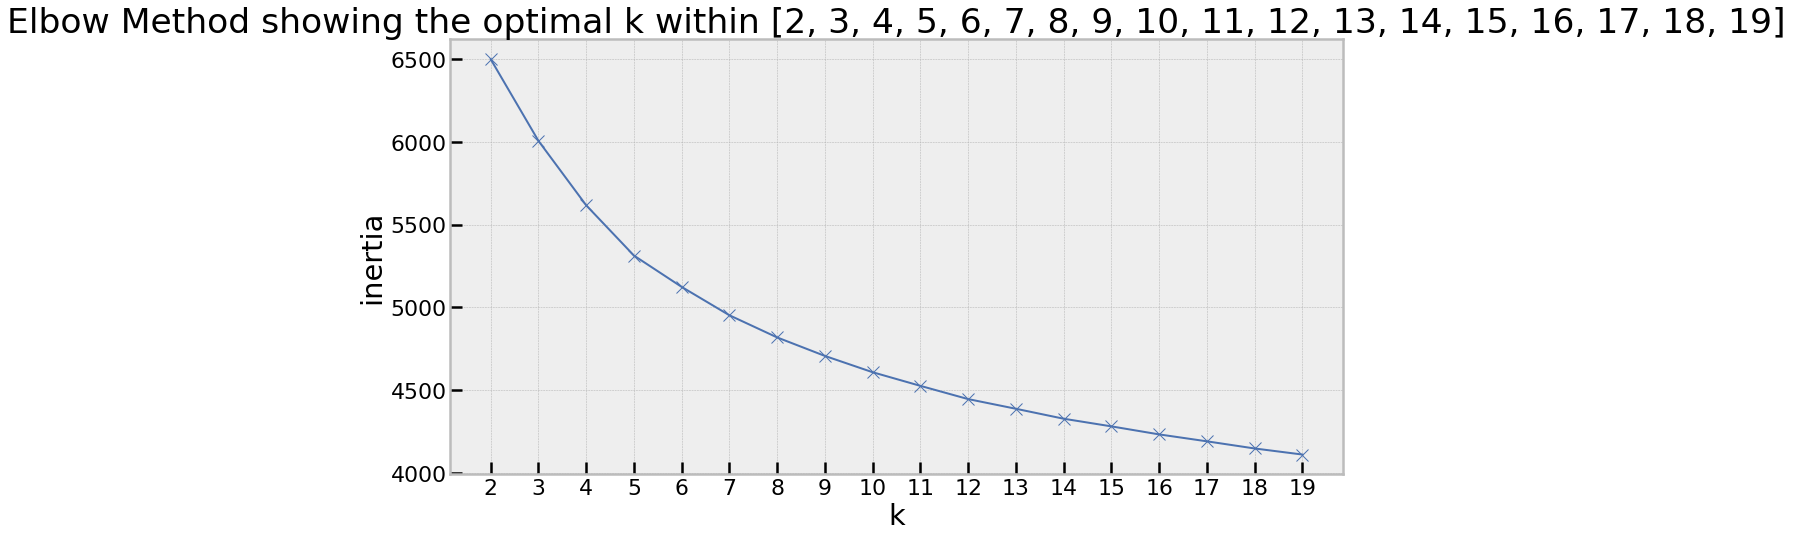

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
K = range(2,20)
inertias = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                random_state=1234,
                n_init=20,
                algorithm='elkan',
                max_iter=25)
    kmeans.fit(x)
    inertias.append(kmeans.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title(f'Elbow Method showing the optimal k within {list(K)}')

## Silhouette Score

Text(0.5, 1.0, 'Elbow Method showing the optimal k within [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]')

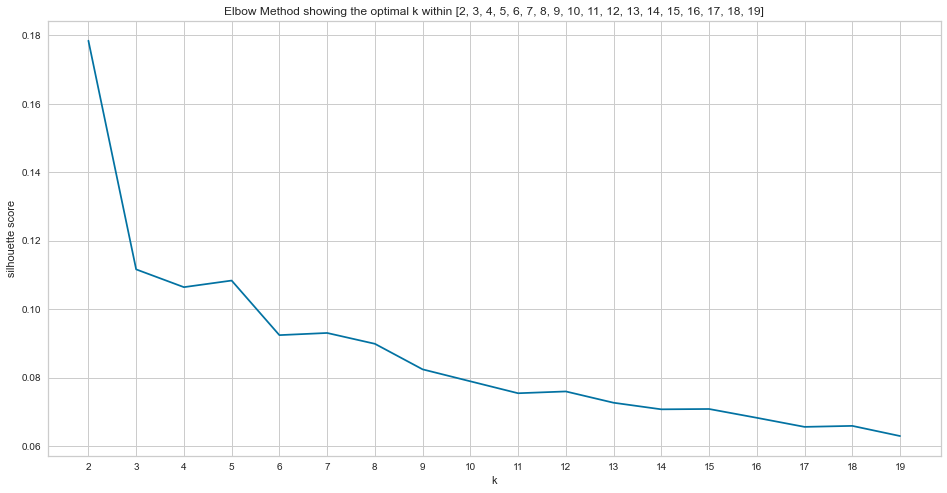

In [49]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
K = range(2,20)
silhouettes = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                random_state=1234,
                n_init=10,
                algorithm='elkan',
                max_iter=10)
    kmeans.fit(x)
    silhouettes.append(silhouette_score(x, kmeans.predict(x)))

plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title(f'Elbow Method showing the optimal k within {list(K)}')

## Cluster Coordinates

In [50]:
# Generating Cluster Coordinates
kmeans = KMeans(n_clusters=5,
                random_state=1234,
                n_init=10,
                algorithm='elkan',
                max_iter=25,
                   )
kmeans.fit(x)
y_kmeans = kmeans.fit(x)
clusters_coordinates = kmeans.cluster_centers_

In [51]:
# Checking the Predicted Cluster Sizes
clusters_predictions = kmeans.predict(x)
pd.Series(clusters_predictions).value_counts().sort_index()

0    3048
1    4586
2    4646
3    3553
4    2887
dtype: int64

In [52]:
# Checking the Shape to ensure the length matches
len(clusters_predictions)

18720

In [53]:
clustered = pd.DataFrame(x, columns=x.columns)
clustered['Cluster'] = clusters_predictions

In [54]:
clustered.head()

Warmth  Reasoning  Emotional Stability  Dominance  Liveliness  \
0   0.375   0.863636                0.575   0.641026       0.525   
1   0.725   0.590909                0.525   0.461538       0.600   
2   0.750   0.818182                0.800   0.589744       0.725   
3   0.775   0.636364                0.775   0.512821       0.675   
4   0.700   0.681818                0.625   0.871795       0.500   

   Rule Consciousness  Social Boldness  Sensitivity  Vigilance  \
0               0.275         0.358974     0.684211      0.600   
1               0.400         0.564103     0.552632      0.500   
2               0.800         0.743590     0.473684      0.375   
3               0.750         0.564103     0.421053      0.450   
4               0.450         0.692308     0.789474      0.575   

   Abstractedness  Privateness  Apprehension  Openness to Change  \
0           0.975        0.400         0.575            0.794872   
1           0.950        0.550         0.575            0.666667   
2           0.550        0.500         0.350            0.666667   
3           0.500        0.575         0.650            0.538462   
4           0.725        0.100         0.525            0.564103   

   Self-Reliance  Perfectionism  Tension  Cluster  
0          0.675       0.368421    0.700        4  
1          0.875       0.342105    0.400        4  
2          0.550       0.605263    0.275        1  
3          0.675       0.736842    0.525        2  
4          0.450       0.526316    0.675        3

## Clustering My Own Test

We can now use the clusters to predict a single test result.

In [55]:
my_test = pd.read_csv("personal_cattell_test.csv")
my_test = clean_personal(my_test)
my_test.shape

In [58]:
x = x.drop(['Cluster'], axis=1)
x.head()

Warmth  Reasoning  Emotional Stability  Dominance  Liveliness  \
0   0.375   0.863636                0.575   0.641026       0.525   
1   0.725   0.590909                0.525   0.461538       0.600   
2   0.750   0.818182                0.800   0.589744       0.725   
3   0.775   0.636364                0.775   0.512821       0.675   
4   0.700   0.681818                0.625   0.871795       0.500   

   Rule Consciousness  Social Boldness  Sensitivity  Vigilance  \
0               0.275         0.358974     0.684211      0.600   
1               0.400         0.564103     0.552632      0.500   
2               0.800         0.743590     0.473684      0.375   
3               0.750         0.564103     0.421053      0.450   
4               0.450         0.692308     0.789474      0.575   

   Abstractedness  Privateness  Apprehension  Openness to Change  \
0           0.975        0.400         0.575            0.794872   
1           0.950        0.550         0.575            0.666667   
2           0.550        0.500         0.350            0.666667   
3           0.500        0.575         0.650            0.538462   
4           0.725        0.100         0.525            0.564103   

   Self-Reliance  Perfectionism  Tension  
0          0.675       0.368421    0.700  
1          0.875       0.342105    0.400  
2          0.550       0.605263    0.275  
3          0.675       0.736842    0.525  
4          0.450       0.526316    0.675

In [60]:
#Running the Cluster Test
my_test = cluster_test(my_test)


Your Test has been placed in Cluster:  3


In [61]:
my_test.head()

Warmth  Reasoning  Emotional Stability  Dominance  Liveliness  \
0     0.7   0.795455                0.275   0.615385       0.575   

   Rule Consciousness  Social Boldness  Sensitivity  Vigilance  \
0               0.475         0.641026     0.684211      0.525   

   Abstractedness  Privateness  Apprehension  Openness to Change  \
0            0.75        0.375           0.8            0.948718   

   Self-Reliance  Perfectionism  Tension  Cluster  
0          0.675       0.447368    0.575        3

## Summary

So I have found myself in Cluster 3, based on the results of my test.

## Exporting the Final Dataset to CSV for Further Exploration


In [62]:
# Merging Old and New Data
print (df2.shape, x.shape)
df2.head()

(18720, 168) (18720, 16)


A1   A2   A3   A4   A5   A6   A7   A8   A9  A10   B1   B2   B3   B4   B5  \
0   1.0  4.0  2.0  3.0  3.0  2.0  3.0  4.0  4.0  3.0  4.0  4.0  5.0  4.0  5.0   
3   4.0  5.0  4.0  4.0  4.0  3.0  3.0  2.0  2.0  2.0  4.0  2.0  4.0  5.0  4.0   
9   5.0  5.0  3.0  3.0  5.0  4.0  4.0  3.0  1.0  3.0  4.0  4.0  5.0  5.0  5.0   
10  5.0  5.0  4.0  5.0  5.0  5.0  4.0  5.0  2.0  3.0  4.0  3.0  5.0  5.0  4.0   
12  5.0  4.0  5.0  4.0  4.0  4.0  3.0  3.0  2.0  4.0  3.0  3.0  4.0  3.0  4.0   

     B6   B7   B8   B9  B10  B11  B12  B13   C1   C2   C3   C4   C5   C6   C7  \
0   4.0  5.0  4.0  1.0  2.0  1.0  1.0  1.0  4.0  5.0  4.0  4.0  2.0  4.0  4.0   
3   5.0  4.0  4.0  3.0  3.0  3.0  2.0  4.0  3.0  2.0  3.0  4.0  3.0  3.0  2.0   
9   3.0  4.0  5.0  2.0  1.0  2.0  1.0  2.0  4.0  4.0  4.0  4.0  4.0  2.0  2.0   
10  4.0  5.0  4.0  5.0  2.0  2.0  4.0  2.0  2.0  5.0  3.0  5.0  5.0  2.0  2.0   
12  4.0  2.0  4.0  1.0  2.0  1.0  1.0  1.0  3.0  5.0  4.0  2.0  1.0  4.0  2.0   

     C8   C9  C10   D1   D2   D3   D4   D5   D6   D7   D8   D9  D10   E1   E2  \
0   3.0  3.0  2.0  4.0  3.0  5.0  5.0  4.0  4.0  3.0  2.0  4.0  3.0  1.0  1.0   
3   2.0  3.0  4.0  3.0  2.0  3.0  4.0  2.0  3.0  3.0  3.0  4.0  3.0  3.0  2.0   
9   1.0  1.0  2.0  3.0  3.0  3.0  4.0  3.0  4.0  2.0  2.0  3.0  2.0  3.0  4.0   
10  1.0  2.0  2.0  2.0  5.0  4.0  4.0  3.0  4.0  3.0  4.0  3.0  4.0  3.0  5.0   
12  1.0  1.0  2.0  5.0  5.0  4.0  5.0  5.0  3.0  1.0  3.0  2.0  1.0  3.0  2.0   

     E3   E4   E5   E6   E7   E8   E9  E10   F1   F2   F3   F4   F5   F6   F7  \
0   4.0  3.0  4.0  5.0  1.0  3.0  3.0  4.0  2.0  2.0  5.0  1.0  1.0  4.0  3.0   
3   4.0  1.0  4.0  4.0  1.0  3.0  2.0  2.0  4.0  3.0  1.0  3.0  2.0  4.0  3.0   
9   5.0  3.0  4.0  3.0  1.0  2.0  2.0  2.0  3.0  4.0  5.0  5.0  5.0  1.0  3.0   
10  4.0  2.0  4.0  4.0  4.0  2.0  2.0  1.0  5.0  4.0  5.0  5.0  5.0  3.0  2.0   
12  4.0  2.0  4.0  2.0  1.0  5.0  2.0  3.0  2.0  3.0  1.0  3.0  3.0  3.0  2.0   

     F8   F9  F10   G1   G2   G3   G4   G5   G6   G7   G8   G9  G10   H1   H2  \
0   5.0  4.0  4.0  3.0  1.0  4.0  2.0  3.0  4.0  3.0  1.0  5.0  1.0  5.0  5.0   
3   4.0  3.0  3.0  2.0  4.0  4.0  4.0  3.0  3.0  3.0  2.0  3.0  3.0  4.0  5.0   
9   1.0  2.0  3.0  4.0  4.0  3.0  5.0  4.0  2.0  1.0  2.0  2.0  3.0  3.0  4.0   
10  4.0  2.0  3.0  5.0  5.0  3.0  4.0  3.0  4.0  2.0  4.0  4.0  3.0  2.0  4.0   
12  4.0  3.0  2.0  4.0  2.0  5.0  4.0  4.0  2.0  1.0  1.0  2.0  1.0  4.0  4.0   

     H3   H4   H5   H6   H7   H8   H9  H10   I1   I2   I3   I4   I5   I6   I7  \
0   5.0  3.0  3.0  3.0  3.0  1.0  2.0  4.0  3.0  4.0  4.0  3.0  4.0  4.0  2.0   
3   2.0  1.0  4.0  2.0  3.0  2.0  2.0  2.0  2.0  2.0  4.0  3.0  4.0  2.0  4.0   
9   2.0  1.0  1.0  3.0  2.0  3.0  2.0  1.0  2.0  3.0  3.0  3.0  4.0  1.0  4.0   
10  2.0  1.0  2.0  3.0  2.0  2.0  2.0  4.0  4.0  3.0  4.0  3.0  5.0  1.0  4.0   
12  4.0  4.0  4.0  3.0  1.0  2.0  1.0  1.0  4.0  2.0  2.0  3.0  5.0  2.0  2.0   

     I8   I9  I10   J1   J2   J3   J4   J5   J6   J7   J8   J9  J10   K1   K2  \
0   4.0  2.0  4.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  2.0  1.0  1.0  2.0  3.0   
3   2.0  4.0  1.0  5.0  5.0  5.0  5.0  5.0  4.0  4.0  1.0  1.0  1.0  3.0  3.0   
9   4.0  4.0  3.0  3.0  3.0  3.0  3.0  3.0  4.0  3.0  4.0  2.0  2.0  3.0  1.0   
10  4.0  4.0  4.0  4.0  2.0  3.0  4.0  4.0  3.0  4.0  4.0  4.0  4.0  4.0  2.0   
12  2.0  2.0  3.0  4.0  4.0  3.0  4.0  3.0  3.0  4.0  2.0  1.0  1.0  1.0  2.0   

     K3   K4   K5   K6   K7   K8   K9  K10   L1   L2   L3   L4   L5   L6   L7  \
0   2.0  4.0  4.0  5.0  2.0  5.0  2.0  5.0  3.0  4.0  3.0  3.0  5.0  3.0  4.0   
3   1.0  4.0  3.0  2.0  2.0  2.0  3.0  3.0  3.0  2.0  4.0  3.0  4.0  4.0  4.0   
9   3.0  3.0  3.0  3.0  2.0  4.0  1.0  3.0  3.0  2.0  2.0  3.0  3.0  2.0  2.0   
10  4.0  5.0  4.0  5.0  2.0  4.0  2.0  3.0  4.0  3.0  4.0  4.0  5.0  4.0  4.0   
12  1.0  2.0  2.0  5.0  5.0  4.0  5.0  5.0  3.0  3.0  4.0  5.0  2.0  3.0  2.0   

     L8   L9  L10   M1   M2   M3   M4   M5   M6   M7   M8   M9  M10   N1   N2  \
0   4.0  2.0  4.0  5.0  4.0 

In [63]:
df2 = df2.reset_index(drop=True)
export = pd.concat((df2, x), axis=1)
export['Cluster'] = clusters_predictions
export.head()

A1   A2   A3   A4   A5   A6   A7   A8   A9  A10   B1   B2   B3   B4   B5  \
0  1.0  4.0  2.0  3.0  3.0  2.0  3.0  4.0  4.0  3.0  4.0  4.0  5.0  4.0  5.0   
1  4.0  5.0  4.0  4.0  4.0  3.0  3.0  2.0  2.0  2.0  4.0  2.0  4.0  5.0  4.0   
2  5.0  5.0  3.0  3.0  5.0  4.0  4.0  3.0  1.0  3.0  4.0  4.0  5.0  5.0  5.0   
3  5.0  5.0  4.0  5.0  5.0  5.0  4.0  5.0  2.0  3.0  4.0  3.0  5.0  5.0  4.0   
4  5.0  4.0  5.0  4.0  4.0  4.0  3.0  3.0  2.0  4.0  3.0  3.0  4.0  3.0  4.0   

    B6   B7   B8   B9  B10  B11  B12  B13   C1   C2   C3   C4   C5   C6   C7  \
0  4.0  5.0  4.0  1.0  2.0  1.0  1.0  1.0  4.0  5.0  4.0  4.0  2.0  4.0  4.0   
1  5.0  4.0  4.0  3.0  3.0  3.0  2.0  4.0  3.0  2.0  3.0  4.0  3.0  3.0  2.0   
2  3.0  4.0  5.0  2.0  1.0  2.0  1.0  2.0  4.0  4.0  4.0  4.0  4.0  2.0  2.0   
3  4.0  5.0  4.0  5.0  2.0  2.0  4.0  2.0  2.0  5.0  3.0  5.0  5.0  2.0  2.0   
4  4.0  2.0  4.0  1.0  2.0  1.0  1.0  1.0  3.0  5.0  4.0  2.0  1.0  4.0  2.0   

    C8   C9  C10   D1   D2   D3   D4   D5   D6   D7   D8   D9  D10   E1   E2  \
0  3.0  3.0  2.0  4.0  3.0  5.0  5.0  4.0  4.0  3.0  2.0  4.0  3.0  1.0  1.0   
1  2.0  3.0  4.0  3.0  2.0  3.0  4.0  2.0  3.0  3.0  3.0  4.0  3.0  3.0  2.0   
2  1.0  1.0  2.0  3.0  3.0  3.0  4.0  3.0  4.0  2.0  2.0  3.0  2.0  3.0  4.0   
3  1.0  2.0  2.0  2.0  5.0  4.0  4.0  3.0  4.0  3.0  4.0  3.0  4.0  3.0  5.0   
4  1.0  1.0  2.0  5.0  5.0  4.0  5.0  5.0  3.0  1.0  3.0  2.0  1.0  3.0  2.0   

    E3   E4   E5   E6   E7   E8   E9  E10   F1   F2   F3   F4   F5   F6   F7  \
0  4.0  3.0  4.0  5.0  1.0  3.0  3.0  4.0  2.0  2.0  5.0  1.0  1.0  4.0  3.0   
1  4.0  1.0  4.0  4.0  1.0  3.0  2.0  2.0  4.0  3.0  1.0  3.0  2.0  4.0  3.0   
2  5.0  3.0  4.0  3.0  1.0  2.0  2.0  2.0  3.0  4.0  5.0  5.0  5.0  1.0  3.0   
3  4.0  2.0  4.0  4.0  4.0  2.0  2.0  1.0  5.0  4.0  5.0  5.0  5.0  3.0  2.0   
4  4.0  2.0  4.0  2.0  1.0  5.0  2.0  3.0  2.0  3.0  1.0  3.0  3.0  3.0  2.0   

    F8   F9  F10   G1   G2   G3   G4   G5   G6   G7   G8   G9  G10   H1   H2  \
0  5.0  4.0  4.0  3.0  1.0  4.0  2.0  3.0  4.0  3.0  1.0  5.0  1.0  5.0  5.0   
1  4.0  3.0  3.0  2.0  4.0  4.0  4.0  3.0  3.0  3.0  2.0  3.0  3.0  4.0  5.0   
2  1.0  2.0  3.0  4.0  4.0  3.0  5.0  4.0  2.0  1.0  2.0  2.0  3.0  3.0  4.0   
3  4.0  2.0  3.0  5.0  5.0  3.0  4.0  3.0  4.0  2.0  4.0  4.0  3.0  2.0  4.0   
4  4.0  3.0  2.0  4.0  2.0  5.0  4.0  4.0  2.0  1.0  1.0  2.0  1.0  4.0  4.0   

    H3   H4   H5   H6   H7   H8   H9  H10   I1   I2   I3   I4   I5   I6   I7  \
0  5.0  3.0  3.0  3.0  3.0  1.0  2.0  4.0  3.0  4.0  4.0  3.0  4.0  4.0  2.0   
1  2.0  1.0  4.0  2.0  3.0  2.0  2.0  2.0  2.0  2.0  4.0  3.0  4.0  2.0  4.0   
2  2.0  1.0  1.0  3.0  2.0  3.0  2.0  1.0  2.0  3.0  3.0  3.0  4.0  1.0  4.0   
3  2.0  1.0  2.0  3.0  2.0  2.0  2.0  4.0  4.0  3.0  4.0  3.0  5.0  1.0  4.0   
4  4.0  4.0  4.0  3.0  1.0  2.0  1.0  1.0  4.0  2.0  2.0  3.0  5.0  2.0  2.0   

    I8   I9  I10   J1   J2   J3   J4   J5   J6   J7   J8   J9  J10   K1   K2  \
0  4.0  2.0  4.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  2.0  1.0  1.0  2.0  3.0   
1  2.0  4.0  1.0  5.0  5.0  5.0  5.0  5.0  4.0  4.0  1.0  1.0  1.0  3.0  3.0   
2  4.0  4.0  3.0  3.0  3.0  3.0  3.0  3.0  4.0  3.0  4.0  2.0  2.0  3.0  1.0   
3  4.0  4.0  4.0  4.0  2.0  3.0  4.0  4.0  3.0  4.0  4.0  4.0  4.0  4.0  2.0   
4  2.0  2.0  3.0  4.0  4.0  3.0  4.0  3.0  3.0  4.0  2.0  1.0  1.0  1.0  2.0   

    K3   K4   K5   K6   K7   K8   K9  K10   L1   L2   L3   L4   L5   L6   L7  \
0  2.0  4.0  4.0  5.0  2.0  5.0  2.0  5.0  3.0  4.0  3.0  3.0  5.0  3.0  4.0   
1  1.0  4.0  3.0  2.0  2.0  2.0  3.0  3.0  3.0  2.0  4.0  3.0  4.0  4.0  4.0   
2  3.0  3.0  3.0  3.0  2.0  4.0  1.0  3.0  3.0  2.0  2.0  3.0  3.0  2.0  2.0   
3  4.0  5.0  4.0  5.0  2.0  4.0  2.0  3.0  4.0  3.0  4.0  4.0  5.0  4.0  4.0   
4  1.0  2.0  2.0  5.0  5.0  4.0  5.0  5.0  3.0  3.0  4.0  5.0  2.0  3.0  2.0   

    L8   L9  L10   M1   M2   M3   M4   M5   M6   M7   M8   M9  M10   N1   N2  \
0  4.0  2.0  4.0  5.0  4.0  4.0  4.0  4.0  1.0  1.0  1.0  3.0  3.0  4.0  4.0

In [65]:
#Need to refactor into function to receive N clusters
globalmean=clustered.iloc[:,0:16].mean(axis=0)
c0mean = clustered.iloc[:,0:16][clustered['Cluster'] == 0].mean(axis=0)
c1mean = clustered.iloc[:,0:16][clustered['Cluster'] == 1].mean(axis=0)
c2mean = clustered.iloc[:,0:16][clustered['Cluster'] == 2].mean(axis=0)
c3mean = clustered.iloc[:,0:16][clustered['Cluster'] == 3].mean(axis=0)
c4mean = clustered.iloc[:,0:16][clustered['Cluster'] == 4].mean(axis=0)


## Creating a new dataframe with Cluster Averages

In [66]:
clustermeans = pd.DataFrame([globalmean,c0mean, c1mean, c2mean, c3mean, c4mean])
clustermeans = clustermeans.round(decimals = 2)
clustermeans = np.transpose(clustermeans)
clustermeans

0     1     2     3     4     5
Warmth               0.68  0.56  0.78  0.68  0.76  0.58
Reasoning            0.64  0.58  0.70  0.54  0.66  0.73
Emotional Stability  0.60  0.36  0.77  0.61  0.51  0.66
Dominance            0.62  0.50  0.69  0.58  0.65  0.64
Liveliness           0.58  0.44  0.66  0.56  0.68  0.49
Rule Consciousness   0.54  0.51  0.61  0.63  0.44  0.43
Social Boldness      0.55  0.32  0.70  0.54  0.63  0.45
Sensitivity          0.62  0.62  0.64  0.54  0.68  0.62
Vigilance            0.46  0.61  0.32  0.42  0.48  0.54
Abstractedness       0.62  0.66  0.56  0.52  0.72  0.71
Privateness          0.48  0.67  0.33  0.48  0.35  0.65
Apprehension         0.54  0.73  0.38  0.56  0.64  0.44
Openness to Change   0.70  0.65  0.75  0.58  0.77  0.78
Self-Reliance        0.59  0.73  0.49  0.54  0.54  0.74
Perfectionism        0.51  0.47  0.56  0.52  0.46  0.51
Tension              0.45  0.59  0.31  0.45  0.52  0.44

In [67]:
clustermeans.columns = ['Global Mean','Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

In [68]:
mtt =  round(np.transpose(my_test), 2)

In [69]:
mtt.columns = ['My Test']
mtt


My Test
Warmth                  0.70
Reasoning               0.80
Emotional Stability     0.28
Dominance               0.62
Liveliness              0.57
Rule Consciousness      0.48
Social Boldness         0.64
Sensitivity             0.68
Vigilance               0.52
Abstractedness          0.75
Privateness             0.38
Apprehension            0.80
Openness to Change      0.95
Self-Reliance           0.68
Perfectionism           0.45
Tension                 0.57
Cluster                 3.00

In [70]:
mtt['Global Mean'] = round(globalmean, 2)
mtt['Cluster 0 Mean'] = round(c0mean, 2)
mtt['Cluster 0 Difference'] = round(mtt['My Test'] - clustermeans['Cluster 0'], 2)
mtt['Cluster 1 Mean'] = round(c1mean, 2)
mtt['Cluster 1 Difference'] = round(mtt['My Test'] - clustermeans['Cluster 1'], 2)
mtt['Cluster 2 Mean'] = round(c2mean, 2)
mtt['Cluster 2 Difference'] = round(mtt['My Test'] - clustermeans['Cluster 2'], 2)
mtt['Cluster 3 Mean'] = round(c3mean, 2)
mtt['Cluster 3 Difference'] = round(mtt['My Test'] - clustermeans['Cluster 3'], 2)
mtt['Cluster 4 Mean'] = round(c4mean, 2)
mtt['Cluster 4 Difference'] = round(mtt['My Test'] - clustermeans['Cluster 4'], 2)

mtt.drop(mtt.tail(1).index,inplace=True)
mtt

My Test  Global Mean  Cluster 0 Mean  \
Warmth                  0.70         0.68            0.56   
Reasoning               0.80         0.64            0.58   
Emotional Stability     0.28         0.60            0.36   
Dominance               0.62         0.62            0.50   
Liveliness              0.57         0.58            0.44   
Rule Consciousness      0.48         0.54            0.51   
Social Boldness         0.64         0.55            0.32   
Sensitivity             0.68         0.62            0.62   
Vigilance               0.52         0.46            0.61   
Abstractedness          0.75         0.62            0.66   
Privateness             0.38         0.48            0.67   
Apprehension            0.80         0.54            0.73   
Openness to Change      0.95         0.70            0.65   
Self-Reliance           0.68         0.59            0.73   
Perfectionism           0.45         0.51            0.47   
Tension                 0.57         0.45            0.59   

                     Cluster 0 Difference  Cluster 1 Mean  \
Warmth                               0.14            0.78   
Reasoning                            0.22            0.70   
Emotional Stability                 -0.08            0.77   
Dominance                            0.12            0.69   
Liveliness                           0.13            0.66   
Rule Consciousness                  -0.03            0.61   
Social Boldness                      0.32            0.70   
Sensitivity                          0.06            0.64   
Vigilance                           -0.09            0.32   
Abstractedness                       0.09            0.56   
Privateness                         -0.29            0.33   
Apprehension                         0.07            0.38   
Openness to Change                   0.30            0.75   
Self-Reliance                       -0.05            0.49   
Perfectionism                       -0.02            0.56   
Tension                             -0.02            0.31   

                     Cluster 1 Difference  Cluster 2 Mean  \
Warmth                              -0.08            0.68   
Reasoning                            0.10            0.54   
Emotional Stability                 -0.49            0.61   
Dominance                           -0.07            0.58   
Liveliness                          -0.09            0.56   
Rule Consciousness                  -0.13            0.63   
Social Boldness                     -0.06            0.54   
Sensitivity                          0.04            0.54   
Vigilance                            0.20            0.42   
Abstractedness                       0.19            0.52   
Privateness                          0.05            0.48   
Apprehension                         0.42            0.56   
Openness to Change                   0.20            0.58   
Self-Reliance                        0.19            0.54   
Perfectionism                       -0.11            0.52   
Tension                              0.26            0.45   

                     Cluster 2 Difference  Cluster 3 Mean  \
Warmth                               0.02            0.76   
Reasoning                            0.26            0.66   
Emotional Stability                 -0.33            0.51   
Dominance                            0.04            0.65   
Liveliness                           0.01            0.68   
Rule Consciousness                  -0.15            0.44   
Social Boldness                      0.10            0.63   
Sensitivity                          0.14            0.68   
Vigilance                            0.10            0.48   
Abstractedness                       0.23            0.72   
Privateness                         -0.10            0.35   
Apprehension                         0.24            0.64   
Openness to Change                   0.37            0.77   
Self-Reliance                        0.14            

In [71]:
#mtt = mtt.sort_values("My Test", ascending=False, inplace = True)
mtt



My Test  Global Mean  Cluster 0 Mean  \
Warmth                  0.70         0.68            0.56   
Reasoning               0.80         0.64            0.58   
Emotional Stability     0.28         0.60            0.36   
Dominance               0.62         0.62            0.50   
Liveliness              0.57         0.58            0.44   
Rule Consciousness      0.48         0.54            0.51   
Social Boldness         0.64         0.55            0.32   
Sensitivity             0.68         0.62            0.62   
Vigilance               0.52         0.46            0.61   
Abstractedness          0.75         0.62            0.66   
Privateness             0.38         0.48            0.67   
Apprehension            0.80         0.54            0.73   
Openness to Change      0.95         0.70            0.65   
Self-Reliance           0.68         0.59            0.73   
Perfectionism           0.45         0.51            0.47   
Tension                 0.57         0.45            0.59   

                     Cluster 0 Difference  Cluster 1 Mean  \
Warmth                               0.14            0.78   
Reasoning                            0.22            0.70   
Emotional Stability                 -0.08            0.77   
Dominance                            0.12            0.69   
Liveliness                           0.13            0.66   
Rule Consciousness                  -0.03            0.61   
Social Boldness                      0.32            0.70   
Sensitivity                          0.06            0.64   
Vigilance                           -0.09            0.32   
Abstractedness                       0.09            0.56   
Privateness                         -0.29            0.33   
Apprehension                         0.07            0.38   
Openness to Change                   0.30            0.75   
Self-Reliance                       -0.05            0.49   
Perfectionism                       -0.02            0.56   
Tension                             -0.02            0.31   

                     Cluster 1 Difference  Cluster 2 Mean  \
Warmth                              -0.08            0.68   
Reasoning                            0.10            0.54   
Emotional Stability                 -0.49            0.61   
Dominance                           -0.07            0.58   
Liveliness                          -0.09            0.56   
Rule Consciousness                  -0.13            0.63   
Social Boldness                     -0.06            0.54   
Sensitivity                          0.04            0.54   
Vigilance                            0.20            0.42   
Abstractedness                       0.19            0.52   
Privateness                          0.05            0.48   
Apprehension                         0.42            0.56   
Openness to Change                   0.20            0.58   
Self-Reliance                        0.19            0.54   
Perfectionism                       -0.11            0.52   
Tension                              0.26            0.45   

                     Cluster 2 Difference  Cluster 3 Mean  \
Warmth                               0.02            0.76   
Reasoning                            0.26            0.66   
Emotional Stability                 -0.33            0.51   
Dominance                            0.04            0.65   
Liveliness                           0.01            0.68   
Rule Consciousness                  -0.15            0.44   
Social Boldness                      0.10            0.63   
Sensitivity                          0.14            0.68   
Vigilance                            0.10            0.48   
Abstractedness                       0.23            0.72   
Privateness                         -0.10            0.35   
Apprehension                         0.24            0.64   
Openness to Change                   0.37            0.77   
Self-Reliance                        0.14            

In [72]:
mtt['My Test'].to_csv(r'my_test_normalized.csv', index = True)
mtt.drop(['My Test'], axis=1).to_csv(r'results_means_normalized.csv', index = True)

## Where is a dashboard like this useful?

* Self-Analysis
* Introspection

## What can be done with the current data?

* This could be broken down by Gender or Country or Source here, but generally, more categorical information would be useful to be able to draw correlated or causal links.

## What is missing?

* A personal link from the data to the world around you. This doesn't really provide you with much more than the test itself, because I don't know who goes into any cluster.
* Further categorical links that allow people to actually connect to other people. The actual bubble connection part. All this data has is categories, no substance.

We need to go deeper!


In [73]:
transp =  mtt.drop(['My Test', 'Cluster 0 Difference', 'Cluster 1 Difference', 'Cluster 2 Difference', 'Cluster 3 Difference', 'Cluster 4 Difference'], axis=1)
transp =  np.transpose(transp)



In [74]:
transp


Warmth  Reasoning  Emotional Stability  Dominance  Liveliness  \
Global Mean       0.68       0.64                 0.60       0.62        0.58   
Cluster 0 Mean    0.56       0.58                 0.36       0.50        0.44   
Cluster 1 Mean    0.78       0.70                 0.77       0.69        0.66   
Cluster 2 Mean    0.68       0.54                 0.61       0.58        0.56   
Cluster 3 Mean    0.76       0.66                 0.51       0.65        0.68   
Cluster 4 Mean    0.58       0.73                 0.66       0.64        0.49   

                Rule Consciousness  Social Boldness  Sensitivity  Vigilance  \
Global Mean                   0.54             0.55         0.62       0.46   
Cluster 0 Mean                0.51             0.32         0.62       0.61   
Cluster 1 Mean                0.61             0.70         0.64       0.32   
Cluster 2 Mean                0.63             0.54         0.54       0.42   
Cluster 3 Mean                0.44             0.63         0.68       0.48   
Cluster 4 Mean                0.43             0.45         0.62       0.54   

                Abstractedness  Privateness  Apprehension  Openness to Change  \
Global Mean               0.62         0.48          0.54                0.70   
Cluster 0 Mean            0.66         0.67          0.73                0.65   
Cluster 1 Mean            0.56         0.33          0.38                0.75   
Cluster 2 Mean            0.52         0.48          0.56                0.58   
Cluster 3 Mean            0.72         0.35          0.64                0.77   
Cluster 4 Mean            0.71         0.65          0.44                0.78   

                Self-Reliance  Perfectionism  Tension  
Global Mean              0.59           0.51     0.45  
Cluster 0 Mean           0.73           0.47     0.59  
Cluster 1 Mean           0.49           0.56     0.31  
Cluster 2 Mean           0.54           0.52     0.45  
Cluster 3 Mean           0.54           0.46     0.52  
Cluster 4 Mean           0.74           0.51     0.44

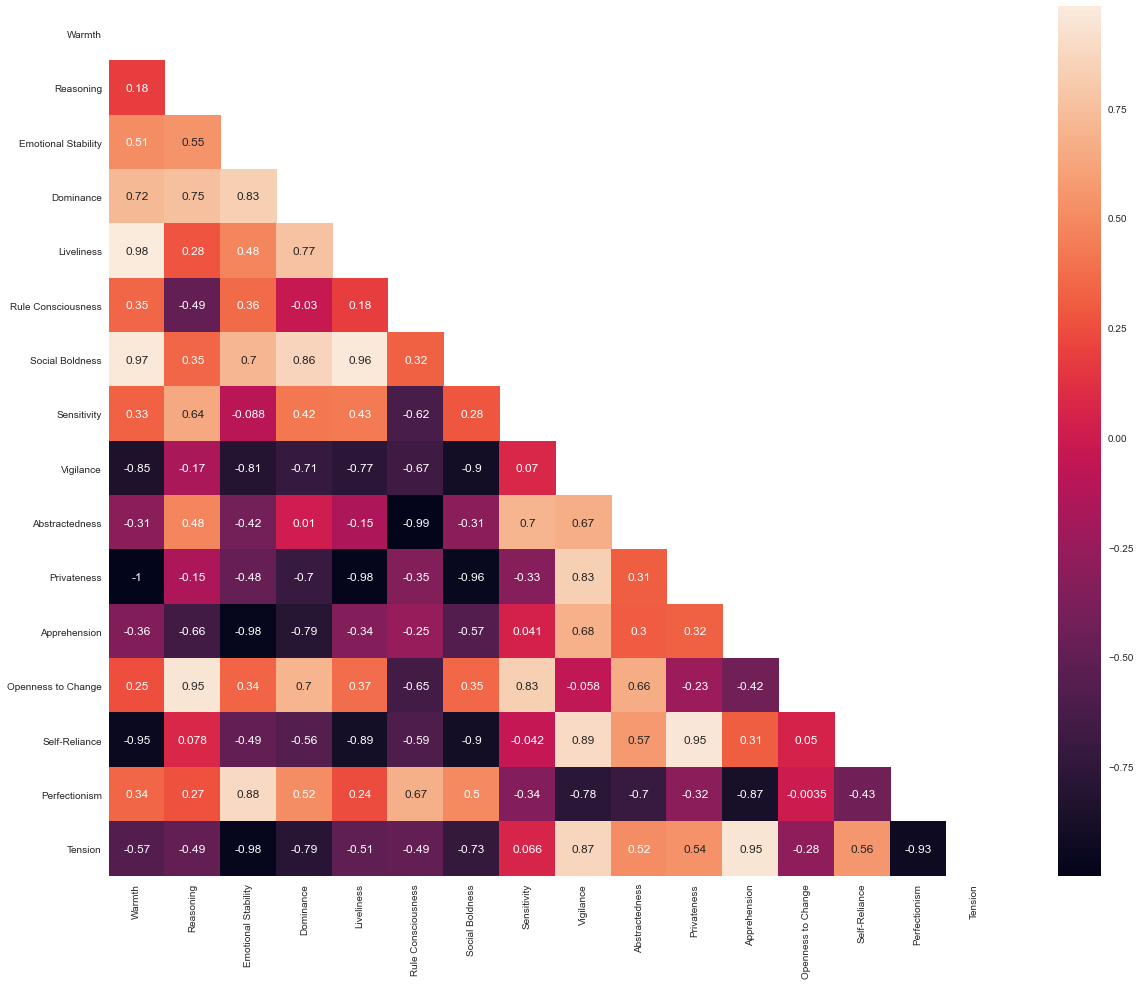

In [75]:
correlations_matrix = transp.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()


# clustermeans = clustermeans.astype('int64')
clustermeans['Cluster'] = clustermeans['Cluster'].astype('category')
clustermeans.dtypes

In [76]:
def distplot(df):
    for column in df.columns:
        sns.distplot(df[column], kde=True)
        plt.show()

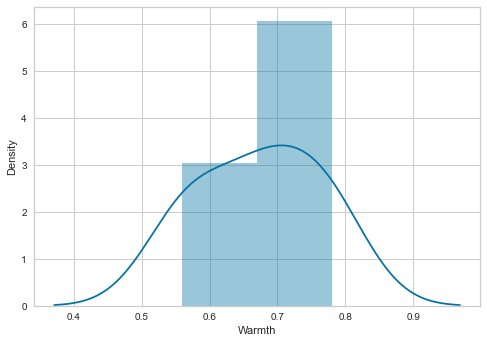

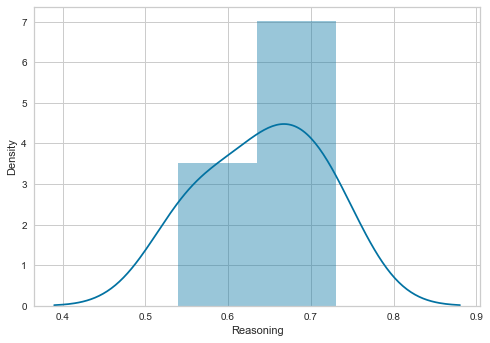

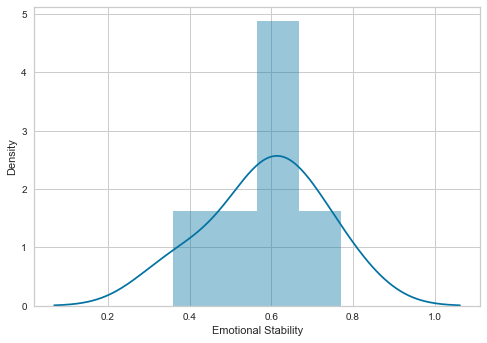

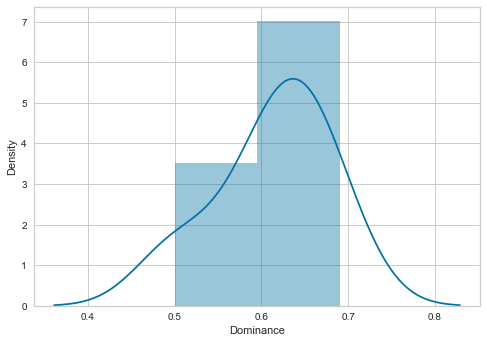

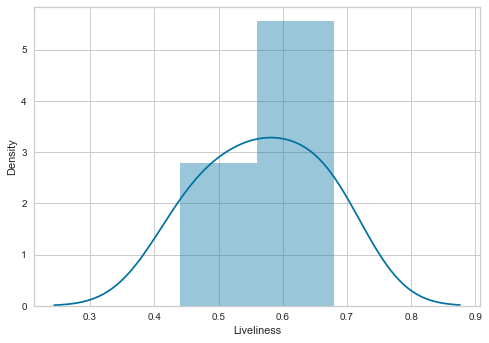

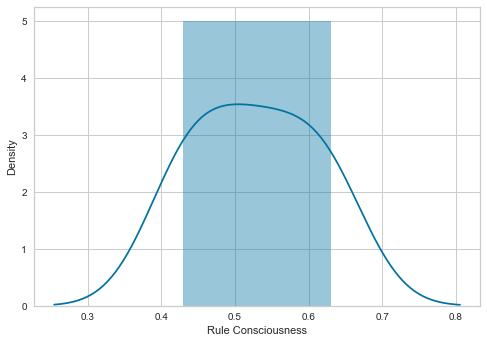

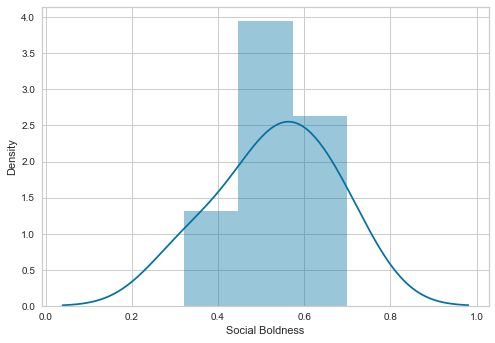

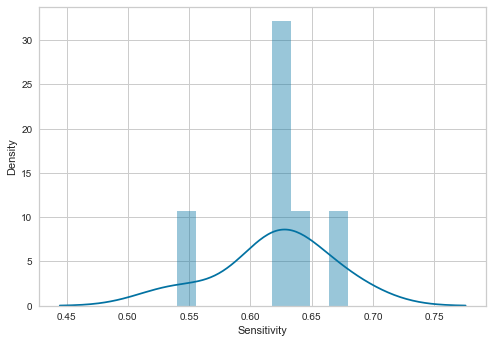

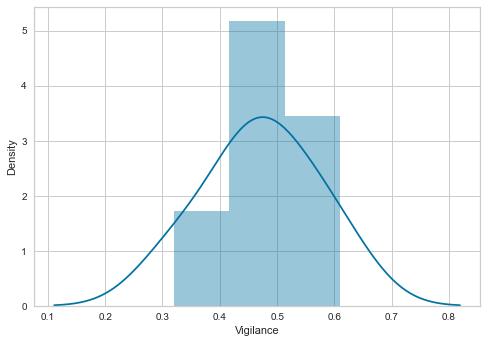

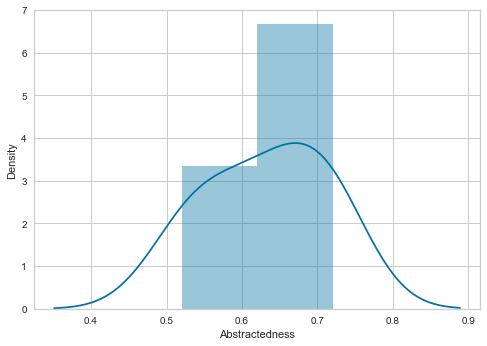

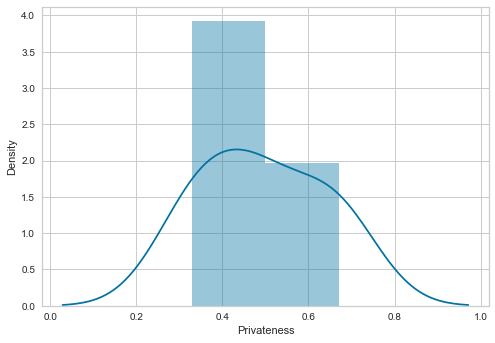

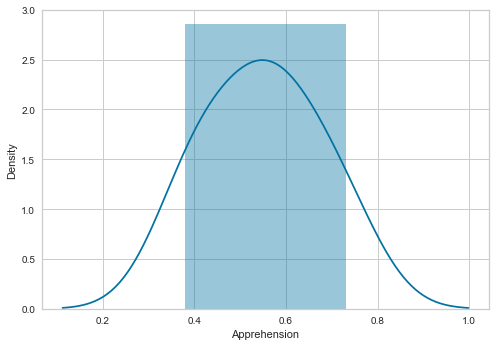

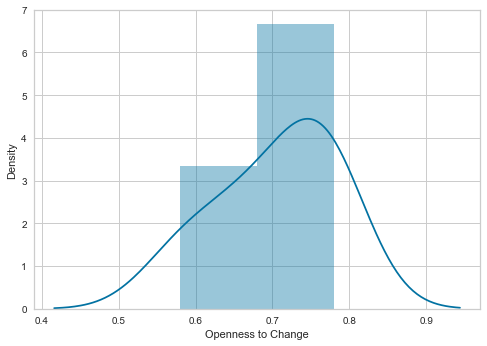

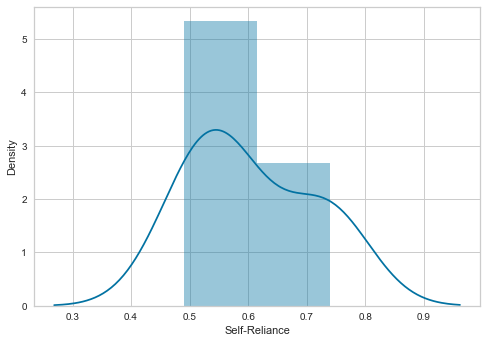

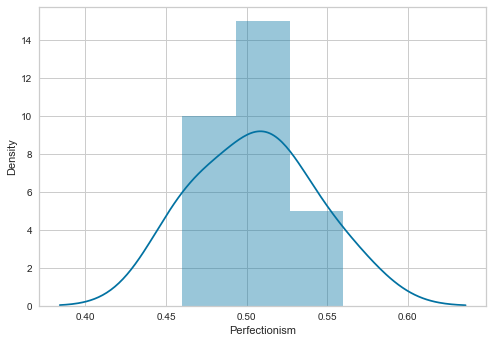

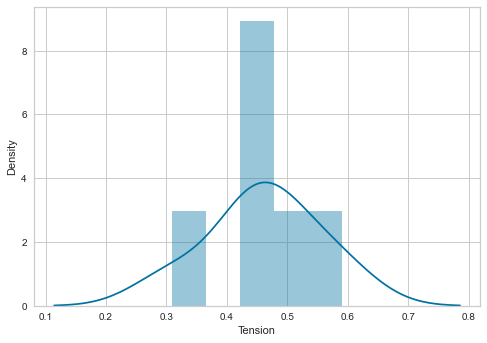

In [77]:
cut = mtt.drop(['Cluster 0 Difference', 'Cluster 1 Difference', 'Cluster 2 Difference', 'Cluster 3 Difference', 'Cluster 4 Difference'], axis=1)
distplot(transp)

In [78]:
#sns.displot(
    #data=export.iloc[:,168:185], y= 'Emotional Stability', hue = 'Cluster', col='Cluster', 
    #kind="ecdf", height=4, aspect=.7)

In [79]:
# Don't need this code
'''def factor_plot(df):
    for column in df.columns:
        sns.displot(
    data=df, y= df.iloc[:,:-1][column], hue = 'Cluster', col='Cluster', 
    kind="ecdf", height=4, aspect=.7, 
)
        plt.show()
  plot = pd.DataFrame(export.iloc[:,163:185])
factor_plot(plot) 
box_plot_cl(plot)
'''

'def factor_plot(df):\n    for column in df.columns:\n        sns.displot(\n    data=df, y= df.iloc[:,:-1][column], hue = \'Cluster\', col=\'Cluster\', \n    kind="ecdf", height=4, aspect=.7, \n)\n        plt.show()\n        \n'

In [80]:
#Cluster is the last column and we don't need to visualise it in our functions
#Box Plot Function
def box_plot_cl(df):
    for column in df.columns:
        sns.boxplot(
        data=df, x = 'Cluster', y = df.iloc[:,:-1][column]
)
        plt.show()
        
        

In [ ]:
#Exporting the analysis set
a_set = export.iloc[:,163:185].drop(['accuracy'], axis = 1)
a_set.to_csv(r'analysis_set.csv', index = False)

#Exporting the Final Cluster Means Table
clustermeans.to_csv(r'cluster_averages.csv', index = True)